In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### *Installing and Importing Libraries*

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import re
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
le = LabelEncoder()
mlb = MultiLabelBinarizer()
scaler = StandardScaler()

## ***1 - Data Loading***

In [4]:
job_salary_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Job_Salary_Prediction_Dataset.csv')

## ***2 - Data Overview Exploration***

#### *Displaying First Fifteen Rows*

In [5]:
job_salary_df.head(15)

Job Id     Experience Qualifications Salary Range  \
0   1.089840e+15  5 to 15 Years         M.Tech    $59K-$99K   
1   3.984540e+14  2 to 12 Years            BCA   $56K-$116K   
2   4.816400e+14  0 to 12 Years            PhD   $61K-$104K   
3   6.881930e+14  4 to 11 Years            PhD    $65K-$91K   
4   1.170580e+14  1 to 12 Years            MBA    $64K-$87K   
5   1.168310e+14  4 to 12 Years            MCA    $59K-$93K   
6   1.292170e+15  3 to 15 Years            PhD   $63K-$103K   
7   1.498780e+15   2 to 8 Years          M.Com   $65K-$102K   
8   1.680290e+15   2 to 9 Years            BBA   $65K-$102K   
9   2.556280e+14  1 to 10 Years            BBA    $60K-$80K   
10  2.696960e+15  3 to 10 Years            BCA   $57K-$104K   
11  1.446190e+15  4 to 12 Years         B.Tech    $64K-$98K   
12  1.914120e+15  3 to 15 Years            MCA   $65K-$122K   
13  2.907620e+14   1 to 8 Years          B.Com    $56K-$86K   
14  1.627540e+15   1 to 9 Years            MCA    $57K-$98K   

                location                Country  Work Type  Company Size  \
0                Douglas            Isle of Man     Intern         26801   
1               Ashgabat           Turkmenistan     Intern        100340   
2                  Macao       Macao SAR, China  Temporary         84525   
3             Porto-Novo                  Benin  Full-Time        129896   
4               Santiago                  Chile     Intern         53944   
5               Brussels                Belgium  Full-Time         23196   
6            George Town         Cayman Islands  Temporary         26119   
7             SÃ£o TomÃ©  Sao Tome and Principe   Contract         40558   
8                   Male               Maldives  Temporary        105343   
9           Saint John's    Antigua and Barbuda  Full-Time        102069   
10                Manama                Bahrain   Contract        130338   
11  The City of Hamilton                Bermuda   Contract        117285   
12              Kingston                Jamaica  Part-Time         79071   
13                Banjul                 Gambia  Temporary        127900   
14              Damascus   Syrian Arab Republic  Full-Time         92128   

   Job Posting Date Preference                     Job Title  \
0         4/24/2022     Female  Digital Marketing Specialist   
1        12/19/2022     Female                 Web Developer   
2         9/14/2022       Male            Operations Manager   
3         2/25/2023     Female              Network Engineer   
4        10/11/2022     Female                 Event Manager   
5         7/25/2023       Male               Software Tester   
6         4/10/2023       Both                       Teacher   
7         9/20/2022     Female                UX/UI Designer   
8         2/19/2022     Female                UX/UI Designer   
9         5/13/2022       Both               Wedding Planner   
10         7/1/2023     Female                    QA Analyst   
11       10/11/2021       Male           Litigation Attorney   
12        1/17/2022       Both           Mechanical Engineer   
13        5/24/2022     Female         Network Administrator   
14         3/1/2022       Male               Account Manager   

                              Role  \
0             Social Media Manager   
1           Frontend Web Developer   
2          Quality Control Manager   
3        Wireless Network Engineer   
4               Conference Manager   
5        Quality Assurance Analyst   
6                Classroom Teacher   
7          User Interface Designer   
8             Interaction Designer   
9               Wedding Consultant   
10  Performance Testing Specialist   
11             Family Law Attorney   
12      Mechanical Design Engineer   
13        Network Security Analyst   
14           Sales Account Manager   

                                      Job Description  \
0   Social Media Managers oversee an organizations...   
1   Frontend Web Developers design a

#### *Displaying No. of Rows and Columns*

In [6]:
print(f"Rows: {job_salary_df.shape[0]}, Columns: {job_salary_df.shape[1]}")

Rows: 1048575, Columns: 17


#### *Displaying Summary of Non-Missing Values and Data Types of Columns*

In [7]:
job_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1048575 non-null  float64
 1   Experience        1048575 non-null  object 
 2   Qualifications    1048575 non-null  object 
 3   Salary Range      1048575 non-null  object 
 4   location          1048575 non-null  object 
 5   Country           1048575 non-null  object 
 6   Work Type         1048575 non-null  object 
 7   Company Size      1048575 non-null  int64  
 8   Job Posting Date  1048575 non-null  object 
 9   Preference        1048575 non-null  object 
 10  Job Title         1048575 non-null  object 
 11  Role              1048575 non-null  object 
 12  Job Description   1048575 non-null  object 
 13  Benefits          1048575 non-null  object 
 14  skills            1048575 non-null  object 
 15  Responsibilities  1048575 non-null  object 
 16  

#### *Displaying Summary Statistics of Numerical Columns*

In [8]:
job_salary_df.describe()

Job Id  Company Size
count  1.048575e+06  1.048575e+06
mean   1.549784e+15  7.370591e+04
std    8.948046e+14  3.530437e+04
min    1.817950e+11  1.264600e+04
25%    7.746125e+14  4.312100e+04
50%    1.549470e+15  7.364100e+04
75%    2.325065e+15  1.043175e+05
max    3.099620e+15  1.348340e+05

## ***3 - Data Cleaning***

### ***Feature Selection - Dropping Unnecssary Columns***

#### *Dropping Job ID*

#### *Reasons*
* It Has No Predictive Value
* It Can Mislead the Model

In [9]:
job_salary_df.drop('Job Id', axis=1, inplace=True)

#### *Dropping Job Description*

#### *Reasons*
* Contains Unstructured Textual Data
* Job Description Column Contains Repititive and Generic Descriptions of Job Role
* Each Distinct Role has Exactly One Corresponding Job Description
* Job Description is a One-to-One textual Mapping of the Role Column
* Job Description increase Noise & Complexity

In [10]:
job_salary_df["Role"].nunique()

376

In [11]:
print((job_salary_df.groupby('Role')['Job Description'].nunique() == 1).sum())


376


In [12]:
job_salary_df.drop('Job Description', axis=1, inplace=True)

#### *Dropping Skills*

#### *Reasons*
* Contains Unstructured Textual Data
* Skills Column Contains Generic Skills Related to Job Role
* Each Distinct Role has Exactly One Corresponding Skills
* Skills is a One-to-One textual Mapping of the Role Column
* Skills increase Noise & Complexity

In [13]:
job_salary_df["Role"].nunique()

376

In [14]:
print((job_salary_df.groupby('Role')['skills'].nunique() == 1).sum())

376


In [15]:
job_salary_df.drop('skills', axis=1, inplace=True)

#### *Dropping Responsibilities*

#### *Reasons*
* Contains Unstructured Textual Data
* Responsibilities Column Contains Generic Responsibilities Information Related to Job Role
* Each Distinct Role has Exactly One Corresponding Responsibility
* Responsibilities is a One-to-One textual Mapping of the Role Column
* Responsibilities increase Noise & Complexity

In [16]:
job_salary_df["Role"].nunique()

376

In [17]:
print((job_salary_df.groupby('Role')['Responsibilities'].nunique() == 1).sum())

376


In [18]:
job_salary_df.drop('Responsibilities', axis=1, inplace=True)

### ***Handling Missing Values***

#### *No Missing Value*

In [19]:
job_salary_df.isnull().sum()

Experience          0
Qualifications      0
Salary Range        0
location            0
Country             0
Work Type           0
Company Size        0
Job Posting Date    0
Preference          0
Job Title           0
Role                0
Benefits            0
Company             0
dtype: int64

### ***Handling Duplicate Enteries / Records***

#### *No Duplicate Enteries / Records*

In [20]:
print(job_salary_df.duplicated().sum())

0


## ***4 - Data Transformation***

#### *Transforming Experience Column*
#### *Details*
* Transforming Experience Column into 2 Columns i.e. Min Experience and Max Experience
* 1 to 5 Years -> Min Experience : 1 , Max Experience : 5
#### *Reasons*
* Numerical Format is Required for Model Training to Identify Patterns
* Preserve Complete Information by Keeping Both Lower Bound and Upper Bound
* Allows Model to Learn How Minimum and Maximum Experience Impact Salary Prediction  

In [21]:
print(job_salary_df["Experience"].unique())

['5 to 15 Years' '2 to 12 Years' '0 to 12 Years' '4 to 11 Years'
 '1 to 12 Years' '4 to 12 Years' '3 to 15 Years' '2 to 8 Years'
 '2 to 9 Years' '1 to 10 Years' '3 to 10 Years' '1 to 8 Years'
 '1 to 9 Years' '5 to 14 Years' '0 to 11 Years' '3 to 12 Years'
 '5 to 9 Years' '0 to 15 Years' '0 to 10 Years' '2 to 14 Years'
 '3 to 9 Years' '4 to 15 Years' '2 to 10 Years' '4 to 8 Years'
 '3 to 8 Years' '1 to 14 Years' '1 to 13 Years' '0 to 8 Years'
 '5 to 10 Years' '2 to 13 Years' '4 to 9 Years' '1 to 15 Years'
 '4 to 10 Years' '5 to 12 Years' '0 to 13 Years' '4 to 14 Years'
 '1 to 11 Years' '4 to 13 Years' '0 to 9 Years' '5 to 8 Years'
 '2 to 15 Years' '5 to 13 Years' '5 to 11 Years' '0 to 14 Years'
 '3 to 13 Years' '2 to 11 Years' '3 to 11 Years' '3 to 14 Years']


In [22]:
def transformExperience(exp):
    numbers = list(map(int, re.findall(r'\d+', exp)))
    # Return minimum and maximum experience
    return numbers[0], numbers[1]

In [23]:
job_salary_df[['Min Experience', 'Max Experience']] = job_salary_df['Experience'].apply(
    lambda x: pd.Series(transformExperience(x))
)

In [24]:
job_salary_df.drop('Experience', axis=1, inplace=True)

#### *Transforming Salary Range Column*
#### *Details*
* Transforming Salary Range Column into Salary Column by Computing the Mean of Minimum and Maximum Salary Range
#### *Reasons*
* Simplifies Target Variable
* Removes Ambiguity and Uncertainity During Model Training by Giving a Specific Learnable Value
* Prevents Model Confusion by Providing a Single-Valued Target Variable
* Minimize Overfitting

In [25]:
print(job_salary_df["Salary Range"].nunique())

561


In [26]:
job_salary_df[['min_salary', 'max_salary']] = job_salary_df['Salary Range']\
    .str.extract(r'\$(\d+)K-\$(\d+)K').astype(float)*1000

In [27]:
job_salary_df['Salary'] = (job_salary_df['min_salary'] + job_salary_df['max_salary']) / 2

In [28]:
job_salary_df.drop(columns=['Salary Range', 'min_salary', 'max_salary'], inplace=True)

#### *Transforming Job Posting Date Column*
#### *Details*
* Transforming Job Posting Date Column is Transformed into 2 Columns :
1.  Job Post Age (Days)
2. Job Posting Year
#### *Reasons*
* Numeric Format for Models
* Captures Market Trends and Time Relevance
* Older Job Posts might offer Less Salaries
* Job Post Age (Days) - Gives a Continuous Numeric Feature Showing How Old the Job Posting Is
* Job Posting Year - Captures Year-Wise Hiring Patterns or Trends

In [29]:
job_salary_df['Job Posting Date'] = pd.to_datetime(job_salary_df['Job Posting Date'])

In [30]:
today = pd.to_datetime('today')
job_salary_df['Job Post Age (Days)'] = (today - job_salary_df['Job Posting Date']).dt.days

In [31]:
job_salary_df['Job Posting Year'] = job_salary_df['Job Posting Date'].dt.year


In [32]:
job_salary_df.drop(columns=['Job Posting Date'], inplace=True)

#### *Combining Location and Country*
#### *Details*
* Combining Location Column and Country Column into Location Column

#### *Reasons*
* Location Captures Complete Specific Location Information in One Signal
* Directly Captures the Relationship Between Geographic Location and Salary
* Reduces Noise & Redundancy

In [33]:
job_salary_df['Location'] = job_salary_df['Country'] + ' - ' + job_salary_df['location']

In [34]:
job_salary_df.drop(columns=['Country','location'], inplace=True)

#### *Combining Job Title and Role Column*
#### *Details*
* Combining Job Title Column and Role Column into Job Profile Column

#### *Reasons*
* Job Title and Role are Very Closely Related
* Job Profile Captures Complete Specific Position Information in One Signal
* Reduces Sparsity
* Reduces Noise & Redundancy

In [35]:
job_salary_df['Job Profile'] = job_salary_df['Job Title'] + ' - ' + job_salary_df['Role']

In [36]:
job_salary_df.drop(columns=['Job Title','Role'], inplace=True)

#### *Storing DataFrame for Visualization*

In [37]:
job_salary_df_visualization = job_salary_df.copy()

In [38]:
job_salary_df_visualization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Qualifications       1048575 non-null  object 
 1   Work Type            1048575 non-null  object 
 2   Company Size         1048575 non-null  int64  
 3   Preference           1048575 non-null  object 
 4   Benefits             1048575 non-null  object 
 5   Company              1048575 non-null  object 
 6   Min Experience       1048575 non-null  int64  
 7   Max Experience       1048575 non-null  int64  
 8   Salary               1048575 non-null  float64
 9   Job Post Age (Days)  1048575 non-null  int64  
 10  Job Posting Year     1048575 non-null  int32  
 11  Location             1048575 non-null  object 
 12  Job Profile          1048575 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(7)
memory usage: 100.0+ MB


In [39]:
job_salary_df_visualization.head()

Qualifications  Work Type  Company Size Preference  \
0         M.Tech     Intern         26801     Female   
1            BCA     Intern        100340     Female   
2            PhD  Temporary         84525       Male   
3            PhD  Full-Time        129896     Female   
4            MBA     Intern         53944     Female   

                                            Benefits  \
0  {'Flexible Spending Accounts (FSAs), Relocatio...   
1  {'Health Insurance, Retirement Plans, Paid Tim...   
2  {'Legal Assistance, Bonuses and Incentive Prog...   
3  {'Transportation Benefits, Professional Develo...   
4  {'Flexible Spending Accounts (FSAs), Relocatio...   

                            Company  Min Experience  Max Experience   Salary  \
0                 Icahn Enterprises               5              15  79000.0   
1      PNC Financial Services Group               2              12  86000.0   
2  United Services Automobile Assn.               0              12  82500.0   
3                              Hess               4              11  78000.0   
4                      Cairn Energy               1              12  75500.0   

   Job Post Age (Days)  Job Posting Year                  Location  \
0                 1095              2022     Isle of Man - Douglas   
1                  856              2022   Turkmenistan - Ashgabat   
2                  952              2022  Macao SAR, China - Macao   
3                  788              2023        Benin - Porto-Novo   
4                  925              2022          Chile - Santiago   

                                         Job Profile  
0  Digital Marketing Specialist - Social Media Ma...  
1             Web Developer - Frontend Web Developer  
2       Operations Manager - Quality Control Manager  
3       Network Engineer - Wireless Network Engineer  
4                 Event Manager - Conference Manager

In [40]:
job_salary_df_visualization.to_csv('job_salary_df_visualization.csv', index=False)

### ***Transforming and Encoding***

#### *Transforming Qualifications Column*
#### *Details*
* Applying One-Hot Encoding
#### *Reasons*
* No Natural Order in Qualifications
* Assuming a Strict Hierarchy might Mislead the Model
* Different Qualifications have Different Values
* Qualifications Do not Necessarily Follows a Strict Linear Order in terms of Salary
* The Relevance of a Qualification can depend on the Industry , the Job Role , and the Specific Company's Requirement

In [41]:
print(job_salary_df["Qualifications"].unique())

['M.Tech' 'BCA' 'PhD' 'MBA' 'MCA' 'M.Com' 'BBA' 'B.Tech' 'B.Com' 'BA']


In [42]:
job_salary_df = pd.get_dummies(job_salary_df, columns=['Qualifications'], prefix='Qual')


#### *Transforming Location and Country*
#### *Details*
* Applying Target Mean Encoding on Location Column

#### *Reasons*
* Directly Encodes Relationship with Target Variable
* Reduces High Cardinality Issues
* Does Not Falsely Impose Order in Roles
* Improves Model Accuracy

In [43]:
location_mean = job_salary_df.groupby('Location')['Salary'].mean()

job_salary_df['Location Encoded'] = job_salary_df['Location'].map(location_mean)

In [44]:
job_salary_df.drop(columns=['Location'], inplace=True)

#### *Transforming Work Type Column*
#### *Details*
* Applying Custom Label Encoding
#### *Reasons*
* Avoids Unnecessary Columns and Reduces Model Complexity
* Captures Ordinal Relationship

In [45]:
print(job_salary_df["Work Type"].unique())

['Intern' 'Temporary' 'Full-Time' 'Contract' 'Part-Time']


In [46]:
work_type_mapping = {
    'Intern': 0,
    'Part-Time': 1,
    'Temporary': 2,
    'Contract': 3,
    'Full-Time': 4
}

# Apply Custom Label Encoding
job_salary_df['Work Type'] = job_salary_df['Work Type'].map(work_type_mapping)

#### *Transforming Preference Column*
#### *Details*
* Applying Label Encoding
#### *Reasons*
* Low Cardinality as Preference Column contains only 3 Unique Categories
* Avoids Unnecessary Columns and Reduces Model Complexity
* Captures Ordinal Relationship
* Faster Computation

In [47]:
print(job_salary_df["Preference"].unique())

['Female' 'Male' 'Both']


In [48]:
job_salary_df['Preference'] = le.fit_transform(job_salary_df['Preference'])

#### *Transforming Job Profile Column*
#### *Details*
* Applying Target Mean Encoding on Job Profile

#### *Reasons*
* Directly Encodes Relationship with Target Variable
* Reduces High Cardinality Issues
* Does Not Falsely Impose Order in Roles
* Improves Model Accuracy

In [49]:
print(job_salary_df["Job Profile"].nunique())

376


In [50]:
role_salary_mean = job_salary_df.groupby('Job Profile')['Salary'].mean()

job_salary_df['Job Profile Encoded'] = job_salary_df['Job Profile'].map(role_salary_mean)

In [51]:
job_salary_df.drop(columns=['Job Profile'], inplace=True)

#### *Transforming Benefits Column*
#### *Details*
* Applying One-Hot Encoding
#### *Reasons*
* No Natural Order in Qualifications
* Total Distinct Benefits are Limited
* Benefits are Not Ordinal. So, Cannot Apply Label Encoding
* Model Can Learn the Effect of each Benefit Separately which Improves Accuracy

In [52]:
print(job_salary_df["Benefits"].nunique())

11


In [53]:
job_salary_df['Benefits List'] = job_salary_df['Benefits'].apply(lambda x: [b.strip() for b in x.strip('{}').split(',')])

# Apply Binarizer
benefits_encoded = mlb.fit_transform(job_salary_df['Benefits List'])

# Create DataFrame of encoded benefits
benefits_df = pd.DataFrame(benefits_encoded, columns=[f'Benefit_{b}' for b in mlb.classes_])

# Concatenate back to original DataFrame
job_salary_df = pd.concat([job_salary_df, benefits_df], axis=1)

#  Drop Original Benefits columns
job_salary_df.drop(['Benefits', 'Benefits List'], axis=1, inplace=True)

#### *Transforming Company Column*
#### *Details*
* Applying Target Mean Encoding
#### *Reasons*
* Encoding is Applied After Saving DataFrame for Visualization
* Directly Encodes Relationship with Target Variable
* Reduces High Cardinality Issues
* Does Not Falsely Impose Order in Companies
* Improves Model Accuracy

In [54]:
print(job_salary_df["Company"].nunique())

888


In [55]:
company_salary_mean = job_salary_df.groupby('Company')['Salary'].mean()

job_salary_df['Company Encoded'] = job_salary_df['Company'].map(company_salary_mean)

In [56]:
job_salary_df.drop('Company', axis=1, inplace=True)

### ***Handling Outliers***

Text(0.5, 1.0, 'Box Plot of Company Size')

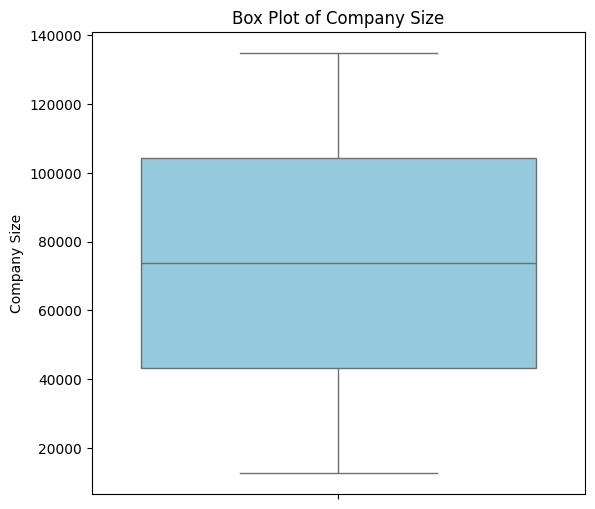

In [57]:
plt.figure(figsize=(14, 6))

# Boxplot for Company Size
plt.subplot(1, 2, 1)
sns.boxplot(y=job_salary_df['Company Size'], color='skyblue')
plt.title('Box Plot of Company Size')

#### *No Outliers in Company Size*

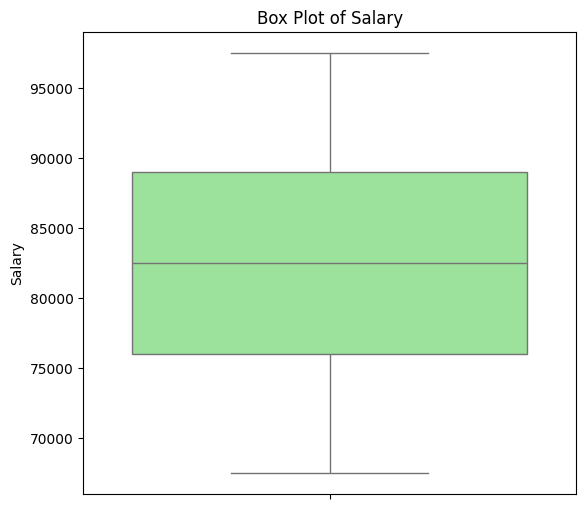

In [58]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=job_salary_df['Salary'], color='lightgreen')
plt.title('Box Plot of Salary')

plt.show()

#### *No Outliers in Salary*

### ***Scaling***

#### *Scaling Company Size*
#### *Details*
* Applying Z-Score Scaling

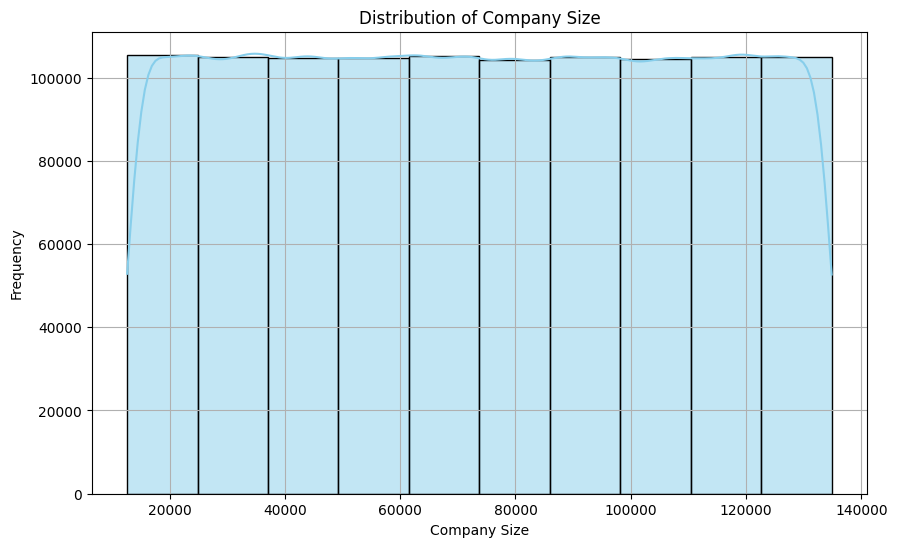

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(job_salary_df['Company Size'], bins=10, color='skyblue', kde=True)
plt.title('Distribution of Company Size')
plt.xlabel('Company Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [60]:
job_salary_df["Company Size"] = scaler.fit_transform(job_salary_df[["Company Size"]])

#### *Scaling Job Post Age*
#### *Details*
* Applying Min-Max Scaling

In [61]:
scaler = MinMaxScaler()
job_salary_df["Job Post Age (Days)"] = scaler.fit_transform(job_salary_df[["Job Post Age (Days)"]])

#### *Scaling Job Posting Year*
#### *Details*
* Applying Min-Max Scaling

In [62]:
job_salary_df["Job Posting Year"] = scaler.fit_transform(job_salary_df[["Job Posting Year"]])

In [63]:
job_salary_df.head()

Work Type  Company Size  Preference  Min Experience  Max Experience  \
0          0     -1.328587           1               5              15   
1          0      0.754414           1               2              12   
2          2      0.306452           2               0              12   
3          4      1.591591           1               4              11   
4          0     -0.559758           1               1              12   

    Salary  Job Post Age (Days)  Job Posting Year  Qual_B.Com  Qual_B.Tech  \
0  79000.0             0.697260               0.5       False        False   
1  86000.0             0.369863               0.5       False        False   
2  82500.0             0.501370               0.5       False        False   
3  78000.0             0.276712               1.0       False        False   
4  75500.0             0.464384               0.5       False        False   

   ...  Benefit_Relocation Assistance  Benefit_Retirement Plans  \
0  ...                              1                         0   
1  ...                              0                         1   
2  ...                              0                         0   
3  ...                              0                         0   
4  ...                              1                         0   

   Benefit_Retirement Plans'  Benefit_Social and Recreational Activities  \
0                          0                                           0   
1                          0                                           0   
2                          1                                           0   
3                          0                                           0   
4                          0                                           0   

   Benefit_Social and Recreational Activities'  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Benefit_Stock Options or Equity Grants  Benefit_Transportation Benefits  \
0                                       0                                0   
1                                       0                                0   
2                                       0                                0   
3                                       0                                0   
4                                       0                                0   

   Benefit_Tuition Reimbursement  Benefit_Wellness Programs  Company Encoded  
0                              0                          0     82513.178914  
1                              0                          0     82470.489039  
2                              0                          1     82556.078767  
3                              0                          0     82318.065068  
4                              0                          0     82476.562500  

[5 rows x 64 columns]

#### *Storing DataFrame for Model Training*

In [64]:
job_salary_df_model = job_salary_df.copy()

In [65]:
job_salary_df_model.to_csv('job_salary_df_model.csv', index=False)

### ***Dataset Overview After Cleaning and Transformation***

In [66]:
job_salary_df_visualization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Qualifications       1048575 non-null  object 
 1   Work Type            1048575 non-null  object 
 2   Company Size         1048575 non-null  int64  
 3   Preference           1048575 non-null  object 
 4   Benefits             1048575 non-null  object 
 5   Company              1048575 non-null  object 
 6   Min Experience       1048575 non-null  int64  
 7   Max Experience       1048575 non-null  int64  
 8   Salary               1048575 non-null  float64
 9   Job Post Age (Days)  1048575 non-null  int64  
 10  Job Posting Year     1048575 non-null  int32  
 11  Location             1048575 non-null  object 
 12  Job Profile          1048575 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(7)
memory usage: 100.0+ MB


In [67]:
job_salary_df_visualization.describe()

Company Size  Min Experience  Max Experience        Salary  \
count  1.048575e+06    1.048575e+06    1.048575e+06  1.048575e+06   
mean   7.370591e+04    2.501410e+00    1.149676e+01  8.249193e+04   
std    3.530437e+04    1.708398e+00    2.291408e+00  7.528770e+03   
min    1.264600e+04    0.000000e+00    8.000000e+00  6.750000e+04   
25%    4.312100e+04    1.000000e+00    9.000000e+00  7.600000e+04   
50%    7.364100e+04    3.000000e+00    1.100000e+01  8.250000e+04   
75%    1.043175e+05    4.000000e+00    1.300000e+01  8.900000e+04   
max    1.348340e+05    5.000000e+00    1.500000e+01  9.750000e+04   

       Job Post Age (Days)  Job Posting Year  
count         1.048575e+06      1.048575e+06  
mean          9.509160e+02      2.022206e+03  
std           2.111549e+02      6.774980e-01  
min           5.860000e+02      2.021000e+03  
25%           7.680000e+02      2.022000e+03  
50%           9.510000e+02      2.022000e+03  
75%           1.134000e+03      2.023000e+03  
max           1.316000e+03      2.023000e+03

In [68]:
job_salary_df_visualization.head()

Qualifications  Work Type  Company Size Preference  \
0         M.Tech     Intern         26801     Female   
1            BCA     Intern        100340     Female   
2            PhD  Temporary         84525       Male   
3            PhD  Full-Time        129896     Female   
4            MBA     Intern         53944     Female   

                                            Benefits  \
0  {'Flexible Spending Accounts (FSAs), Relocatio...   
1  {'Health Insurance, Retirement Plans, Paid Tim...   
2  {'Legal Assistance, Bonuses and Incentive Prog...   
3  {'Transportation Benefits, Professional Develo...   
4  {'Flexible Spending Accounts (FSAs), Relocatio...   

                            Company  Min Experience  Max Experience   Salary  \
0                 Icahn Enterprises               5              15  79000.0   
1      PNC Financial Services Group               2              12  86000.0   
2  United Services Automobile Assn.               0              12  82500.0   
3                              Hess               4              11  78000.0   
4                      Cairn Energy               1              12  75500.0   

   Job Post Age (Days)  Job Posting Year                  Location  \
0                 1095              2022     Isle of Man - Douglas   
1                  856              2022   Turkmenistan - Ashgabat   
2                  952              2022  Macao SAR, China - Macao   
3                  788              2023        Benin - Porto-Novo   
4                  925              2022          Chile - Santiago   

                                         Job Profile  
0  Digital Marketing Specialist - Social Media Ma...  
1             Web Developer - Frontend Web Developer  
2       Operations Manager - Quality Control Manager  
3       Network Engineer - Wireless Network Engineer  
4                 Event Manager - Conference Manager

In [69]:
job_salary_df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 64 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Work Type                                    1048575 non-null  int64  
 1   Company Size                                 1048575 non-null  float64
 2   Preference                                   1048575 non-null  int64  
 3   Min Experience                               1048575 non-null  int64  
 4   Max Experience                               1048575 non-null  int64  
 5   Salary                                       1048575 non-null  float64
 6   Job Post Age (Days)                          1048575 non-null  float64
 7   Job Posting Year                             1048575 non-null  float64
 8   Qual_B.Com                                   1048575 non-null  bool   
 9   Qual_B.Tech                                  1

In [70]:
job_salary_df_model.describe()

Work Type  Company Size    Preference  Min Experience  \
count  1.048575e+06  1.048575e+06  1.048575e+06    1.048575e+06   
mean   1.998992e+00 -2.046434e-18  1.000416e+00    2.501410e+00   
std    1.413167e+00  1.000000e+00  8.168343e-01    1.708398e+00   
min    0.000000e+00 -1.729529e+00  0.000000e+00    0.000000e+00   
25%    1.000000e+00 -8.663212e-01  0.000000e+00    1.000000e+00   
50%    2.000000e+00 -1.838685e-03  1.000000e+00    3.000000e+00   
75%    3.000000e+00  8.670767e-01  2.000000e+00    4.000000e+00   
max    4.000000e+00  1.731460e+00  2.000000e+00    5.000000e+00   

       Max Experience        Salary  Job Post Age (Days)  Job Posting Year  \
count    1.048575e+06  1.048575e+06         1.048575e+06      1.048575e+06   
mean     1.149676e+01  8.249193e+04         4.998849e-01      6.027909e-01   
std      2.291408e+00  7.528770e+03         2.892533e-01      3.387490e-01   
min      8.000000e+00  6.750000e+04         0.000000e+00      0.000000e+00   
25%      9.000000e+00  7.600000e+04         2.493151e-01      5.000000e-01   
50%      1.100000e+01  8.250000e+04         5.000000e-01      5.000000e-01   
75%      1.300000e+01  8.900000e+04         7.506849e-01      1.000000e+00   
max      1.500000e+01  9.750000e+04         1.000000e+00      1.000000e+00   

       Location Encoded  Job Profile Encoded  ...  \
count      1.048575e+06         1.048575e+06  ...   
mean       8.249193e+04         8.249193e+04  ...   
std        1.056374e+02         1.351851e+02  ...   
min        8.225651e+04         8.201612e+04  ...   
25%        8.241687e+04         8.239996e+04  ...   
50%        8.249456e+04         8.249423e+04  ...   
75%        8.256286e+04         8.258650e+04  ...   
max        8.273704e+04         8.286586e+04  ...   

       Benefit_Relocation Assistance  Benefit_Retirement Plans  \
count                   1.048575e+06              1.048575e+06   
mean                    1.999208e-01              1.005021e-01   
std                     3.999408e-01              3.006685e-01   
min                     0.000000e+00              0.000000e+00   
25%                     0.000000e+00              0.000000e+00   
50%                     0.000000e+00              0.000000e+00   
75%                     0.000000e+00              0.000000e+00   
max                     1.000000e+00              1.000000e+00   

       Benefit_Retirement Plans'  Benefit_Social and Recreational Activities  \
count               1.048575e+06                                1.048575e+06   
mean                1.000014e-01                                9.981451e-02   
std                 3.000021e-01                                2.997527e-01   
min                 0.000000e+00                                0.000000e+00   
25%                 0.000000e+00                                0.000000e+00   
50%                 0.000000e+00                                0.000000e+00   
75%                 0.000000e+00                                0.000000e+00   
max                 1.000000e+00                                1.000000e+00   

       Benefit_Social and Recreational Activities'  \
count                                 1.048575e+06   
mean                                  9.964857e-02   
std                                   2.995310e-01   
min                                   0.000000e+00   
25%                                   0.000000e+00   
50%                                   0.000000e+00   
75%                                   0.000000e+00   
max                                   1.000000e+00   

       Benefit_Stock Options or Equity Grants  \
count                            1.048575e+06   
mean                             1.997606e-01   
std                              3.998205e-01   
min                              0.000000e+00   
25%                              0.000000e+00   
50%                              0.000000e+00   
75%                              0.000000e+00   
max                           

In [71]:
job_salary_df_model.head()

Work Type  Company Size  Preference  Min Experience  Max Experience  \
0          0     -1.328587           1               5              15   
1          0      0.754414           1               2              12   
2          2      0.306452           2               0              12   
3          4      1.591591           1               4              11   
4          0     -0.559758           1               1              12   

    Salary  Job Post Age (Days)  Job Posting Year  Qual_B.Com  Qual_B.Tech  \
0  79000.0             0.697260               0.5       False        False   
1  86000.0             0.369863               0.5       False        False   
2  82500.0             0.501370               0.5       False        False   
3  78000.0             0.276712               1.0       False        False   
4  75500.0             0.464384               0.5       False        False   

   ...  Benefit_Relocation Assistance  Benefit_Retirement Plans  \
0  ...                              1                         0   
1  ...                              0                         1   
2  ...                              0                         0   
3  ...                              0                         0   
4  ...                              1                         0   

   Benefit_Retirement Plans'  Benefit_Social and Recreational Activities  \
0                          0                                           0   
1                          0                                           0   
2                          1                                           0   
3                          0                                           0   
4                          0                                           0   

   Benefit_Social and Recreational Activities'  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Benefit_Stock Options or Equity Grants  Benefit_Transportation Benefits  \
0                                       0                                0   
1                                       0                                0   
2                                       0                                0   
3                                       0                                0   
4                                       0                                0   

   Benefit_Tuition Reimbursement  Benefit_Wellness Programs  Company Encoded  
0                              0                          0     82513.178914  
1                              0                          0     82470.489039  
2                              0                          1     82556.078767  
3                              0                          0     82318.065068  
4                              0                          0     82476.562500  

[5 rows x 64 columns]

# **5. Exploratory Data Analysis**



In [72]:
column_names = job_salary_df_visualization.columns.tolist()


print(column_names)

['Qualifications', 'Work Type', 'Company Size', 'Preference', 'Benefits', 'Company', 'Min Experience', 'Max Experience', 'Salary', 'Job Post Age (Days)', 'Job Posting Year', 'Location', 'Job Profile']


## Univariate Analysis  

### *Reasons for Univariate Analysis:*  
- Helps understand the distribution of a single feature.  
- Identifies outliers, central tendency, and spread.  
- Provides basic insights before moving to complex relationships.  

### *Insights from Univariate Analysis:*  
#### *1. Salary Distribution:*  
- If a right-skewed histogram appears, most salaries are low, with some high-paying jobs.  
- A box plot with outliers suggests a few exceptionally high salaries.  

#### *2. Experience Levels:*  
- If bimodal peaks exist, there may be two types of jobs: entry-level and senior.  

#### *3. Categorical Variables (Job Titles, Locations):*  
- Bar charts can highlight the most common job roles & locations.  
- Uneven distributions suggest demand varies across categories.  


<Figure size 1200x400 with 0 Axes>

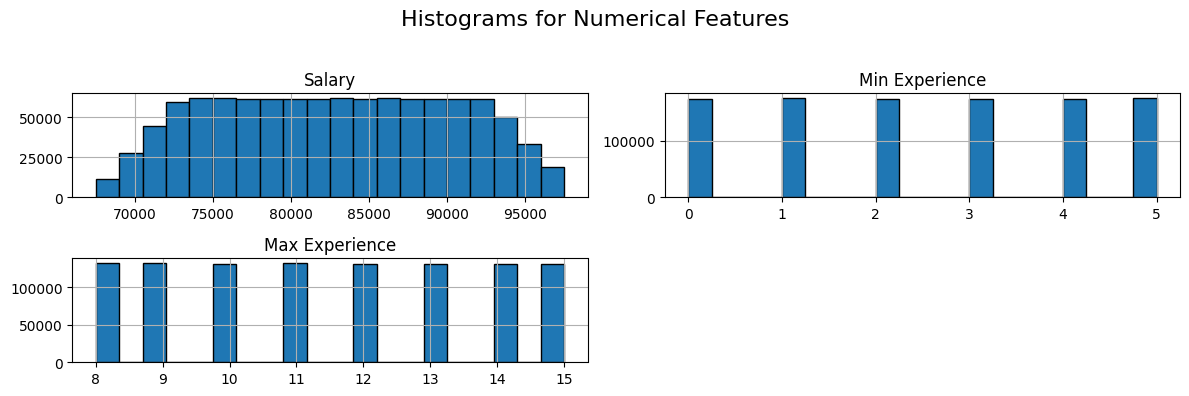

In [73]:
numerical_cols = ['Salary', 'Min Experience', 'Max Experience']

plt.figure(figsize=(12, 4))
job_salary_df_visualization[numerical_cols].hist(figsize=(12, 4), bins=20, edgecolor='black')
plt.suptitle("Histograms for Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


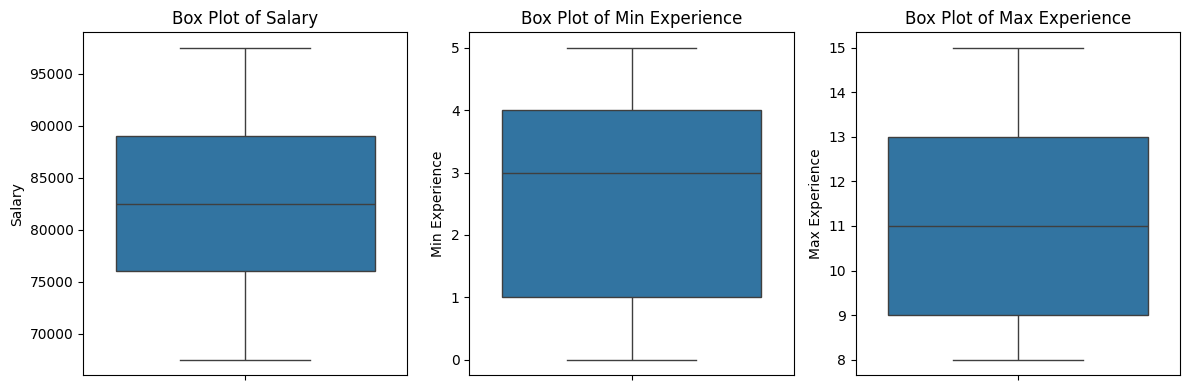

In [74]:
plt.figure(figsize=(12, 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(y=job_salary_df_visualization[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [75]:
job_salary_df_visualization[['Work Type', 'Company Size', 'Location']].head()

Work Type  Company Size                  Location
0     Intern         26801     Isle of Man - Douglas
1     Intern        100340   Turkmenistan - Ashgabat
2  Temporary         84525  Macao SAR, China - Macao
3  Full-Time        129896        Benin - Porto-Novo
4     Intern         53944          Chile - Santiago

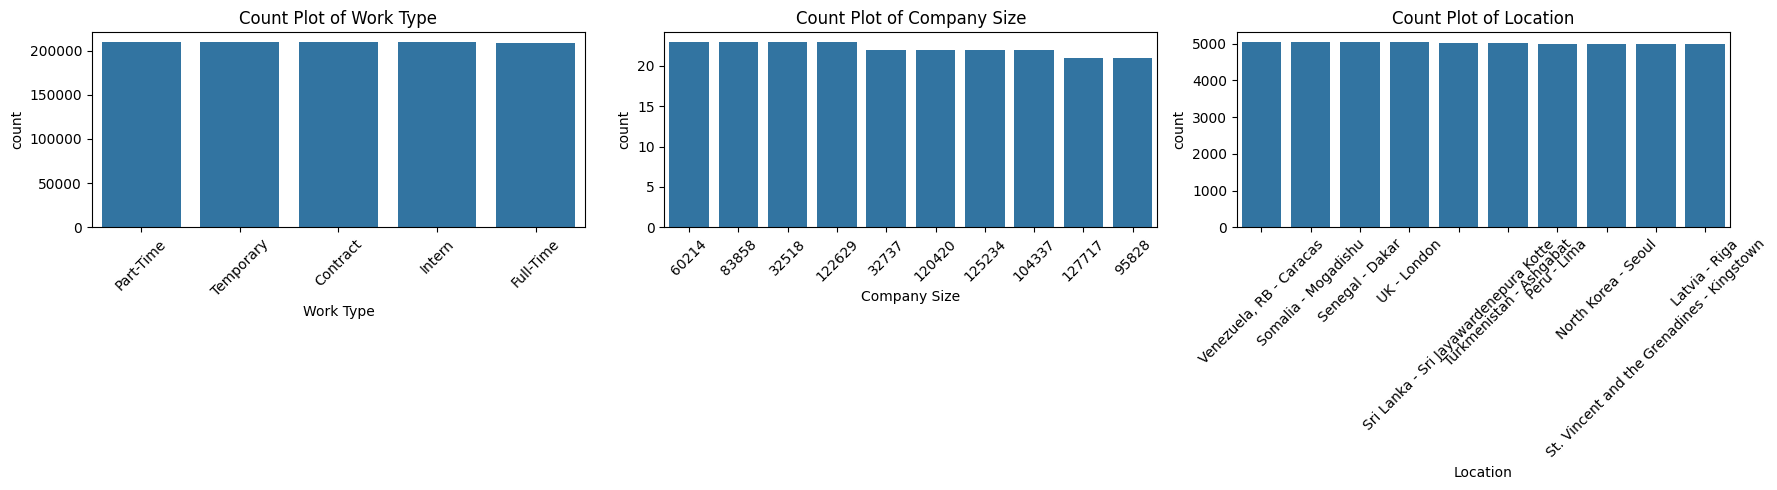

In [76]:
categorical_cols = ['Work Type', 'Company Size', 'Location']

# Convert "Company Size" to string since it's categorical
job_salary_df_visualization['Company Size'] = job_salary_df_visualization['Company Size'].astype(str)

# Ensure all categorical columns are string type
for col in categorical_cols:
    job_salary_df_visualization[col] = job_salary_df_visualization[col].astype(str)

plt.figure(figsize=(18, 5))

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i + 1)

    # Take only top 10 most frequent categories to avoid too many bars
    top_categories = job_salary_df_visualization[col].value_counts().nlargest(10).index

    sns.countplot(data=job_salary_df_visualization, x=col,
                  order=top_categories)

    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()

## Bivariate Analysis

## *Reasons for Bivariate Analysis:*  
- Examines how two variables interact, revealing correlations & trends.  
- Helps determine relationships between salary, experience, location, etc.  

## *Insights from Bivariate Analysis:*  
### *1. Salary vs. Experience (Scatter Plot):*  
- A positive correlation means higher experience leads to higher salary.  
- If scattered without pattern, experience does not strongly impact salary.  

### *2. Salary vs. Job Type (Box Plot):*  
- If remote jobs have higher median salaries, companies pay more for remote flexibility.  

### *3. Salary vs. Location (Bar Plot):*  
- If certain locations dominate, it shows regional salary variations.  

### *4. Correlation Heatmap:*  
- If salary correlates strongly with experience but not company size, then experience matters more than the employer.  


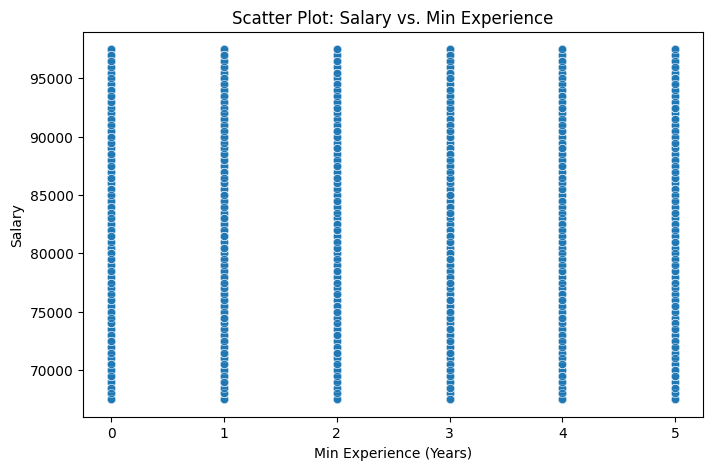

In [77]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=job_salary_df_visualization['Min Experience'], y=job_salary_df_visualization['Salary'], alpha=0.6)
plt.title("Scatter Plot: Salary vs. Min Experience")
plt.xlabel("Min Experience (Years)")
plt.ylabel("Salary")
plt.show()

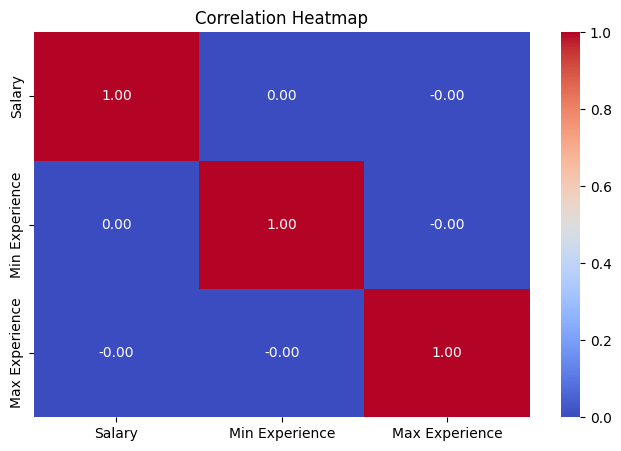

In [78]:
plt.figure(figsize=(8, 5))
sns.heatmap(job_salary_df_visualization[['Salary', 'Min Experience', 'Max Experience']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

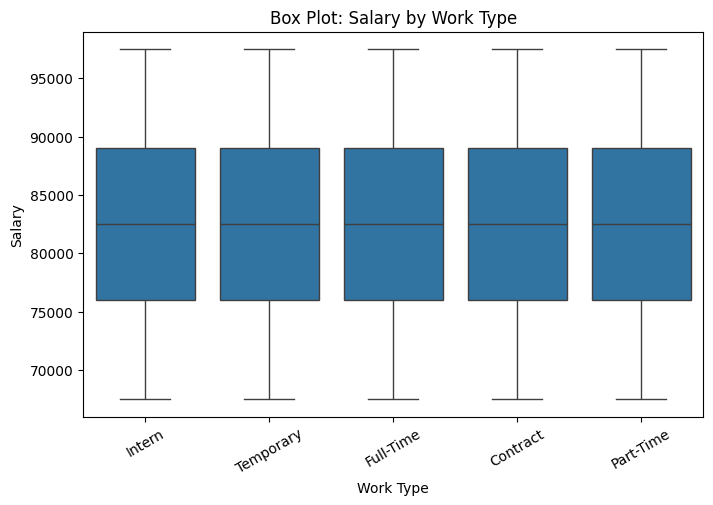

In [79]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=job_salary_df_visualization, x='Work Type', y='Salary')
plt.xticks(rotation=30)
plt.title("Box Plot: Salary by Work Type")
plt.show()

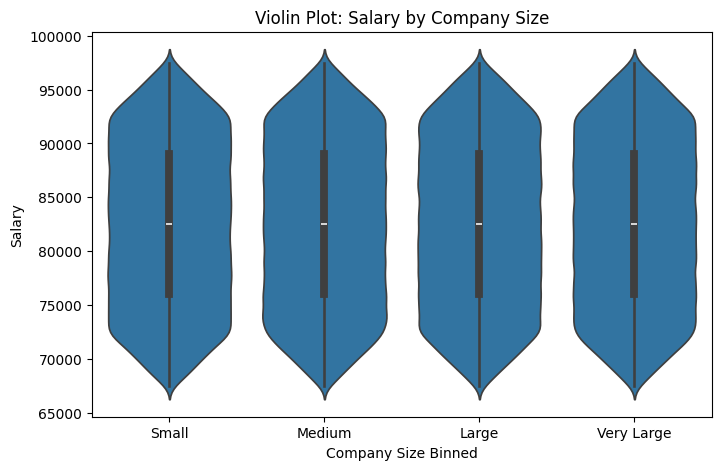

In [80]:
# Convert 'Company Size' to numeric (if it's stored as a string)
job_salary_df_visualization['Company Size'] = pd.to_numeric(job_salary_df_visualization['Company Size'], errors='coerce')

# Drop rows where conversion failed (if any)
job_salary_df_visualization = job_salary_df_visualization.dropna(subset=['Company Size'])

# Bin Company Size into categories
job_salary_df_visualization['Company Size Binned'] = pd.qcut(
    job_salary_df_visualization['Company Size'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large']
)

# Plot violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=job_salary_df_visualization, x='Company Size Binned', y='Salary')
plt.title("Violin Plot: Salary by Company Size")
plt.show()


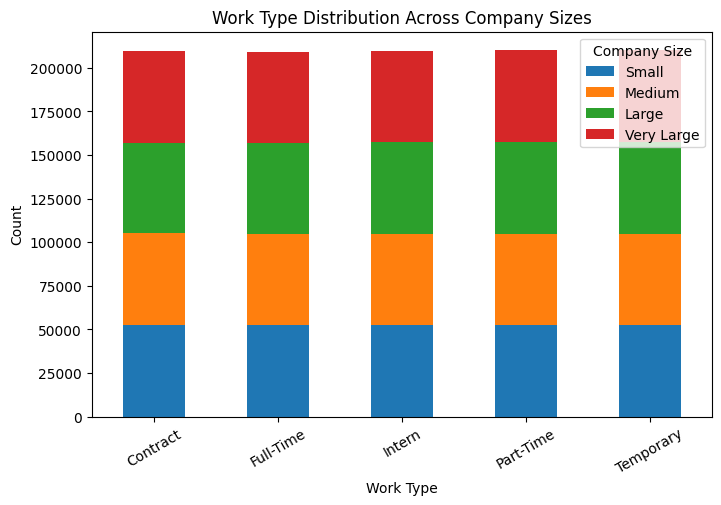

In [81]:
# Convert 'Company Size' to numeric if needed
job_salary_df_visualization['Company Size'] = pd.to_numeric(job_salary_df_visualization['Company Size'], errors='coerce')

# Create bins for Company Size (quartiles)
job_salary_df_visualization['Company Size Binned'] = pd.qcut(
    job_salary_df_visualization['Company Size'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large']
)

# Crosstab and stacked bar plot
pd.crosstab(job_salary_df_visualization['Work Type'], job_salary_df_visualization['Company Size Binned']).plot(
    kind="bar", stacked=True, figsize=(8, 5)
)
plt.title("Work Type Distribution Across Company Sizes")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Company Size")
plt.show()

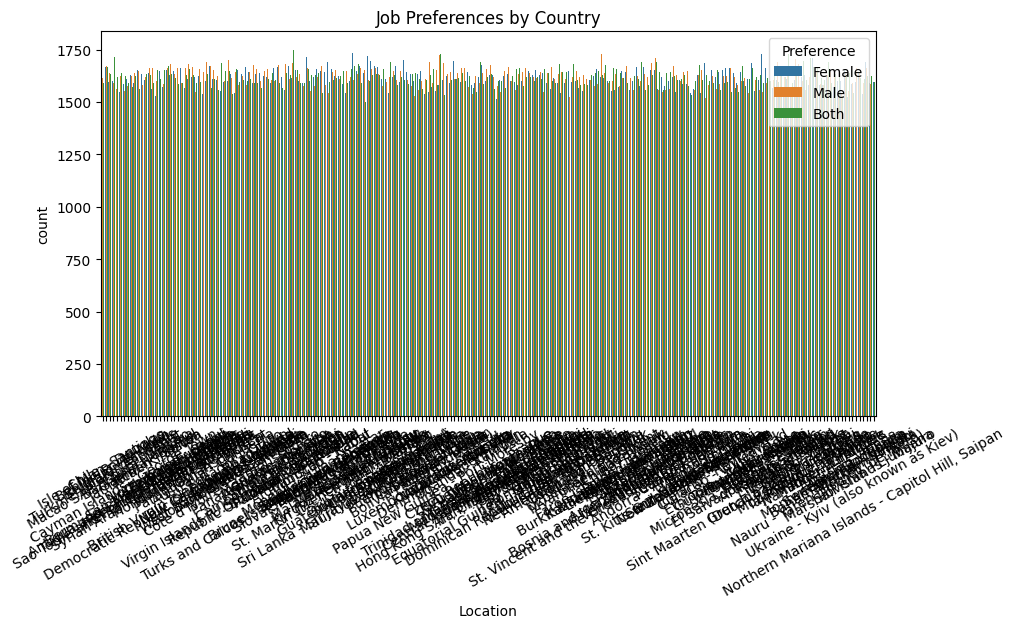

In [82]:
plt.figure(figsize=(10, 5))
sns.countplot(data=job_salary_df_visualization, x='Location', hue='Preference')
plt.xticks(rotation=30)
plt.title("Job Preferences by Country")
plt.show()

## *3. Multivariate Analysis*  

### *Reasons for Multivariate Analysis:*  
- Shows deeper insights by combining multiple factors.  
- Helps in decision-making & predictive modeling.  

### *Insights from Multivariate Analysis:*  
#### *1. 3D Scatter Plot (Salary, Experience, Company Size):*  
- If large companies cluster at higher salaries, size affects salary significantly.  

#### *2. Grouped Box Plot (Work Type & Company Size vs. Salary):*  
- If remote jobs at big companies have high median salaries, it confirms that top firms pay more for flexibility.  

#### *3. Heatmap (Preferences vs. Work Type):*  
- If most job seekers prefer remote work, companies may adjust hiring policies.  

#### *4. FacetGrid (Salary by Location & Work Type):*  
- If some locations show high salaries for specific work types, job seekers can target those regions.  


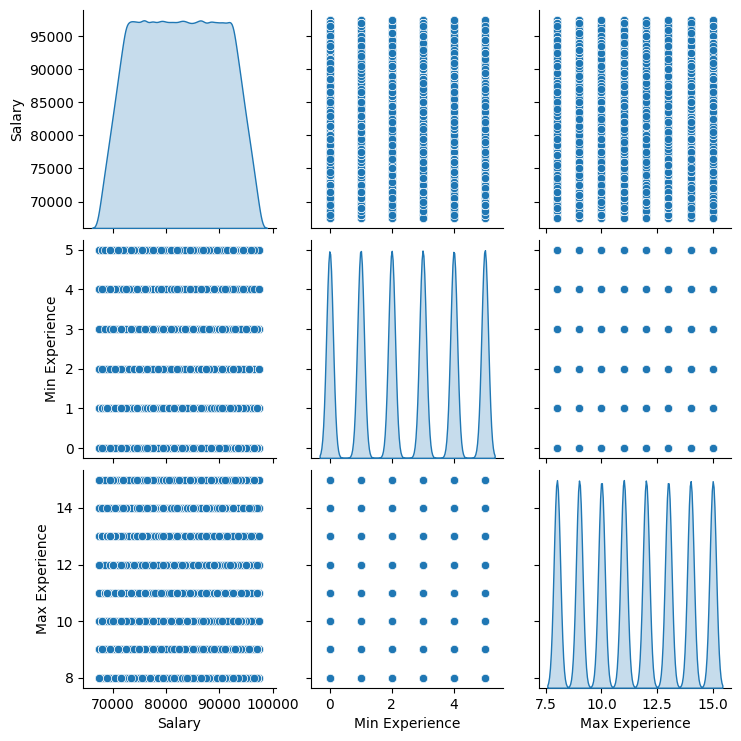

In [83]:
sns.pairplot(job_salary_df_visualization[['Salary', 'Min Experience', 'Max Experience']], diag_kind='kde')
plt.show()

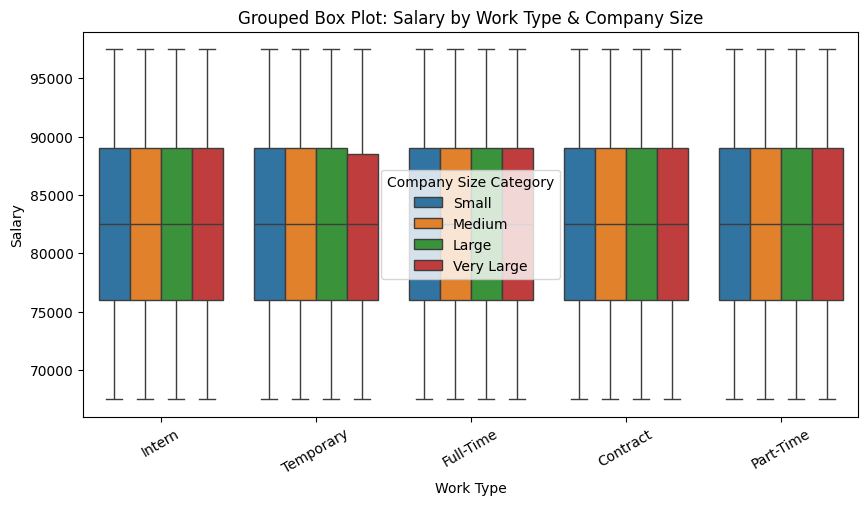

In [84]:
# Bin 'Company Size' into categories
job_salary_df_visualization['Company Size Binned'] = pd.qcut(
    job_salary_df_visualization['Company Size'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large']
)

# Create boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=job_salary_df_visualization, x='Work Type', y='Salary', hue='Company Size Binned')
plt.xticks(rotation=30)
plt.title("Grouped Box Plot: Salary by Work Type & Company Size")
plt.legend(title="Company Size Category")
plt.show()

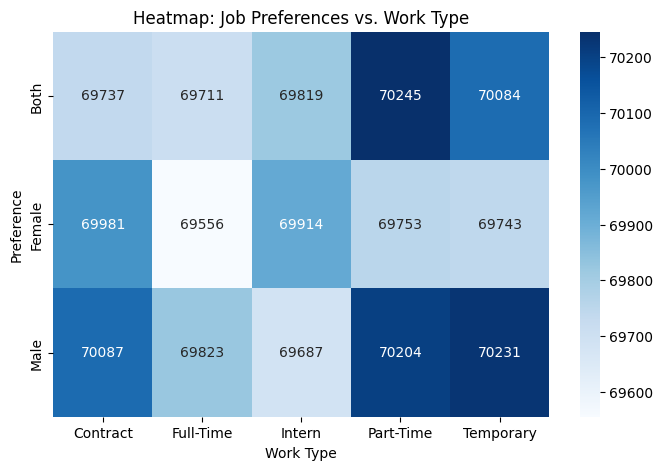

In [85]:
heatmap_data = pd.crosstab(job_salary_df_visualization['Preference'], job_salary_df_visualization['Work Type'])
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt="d")
plt.title("Heatmap: Job Preferences vs. Work Type")
plt.show()

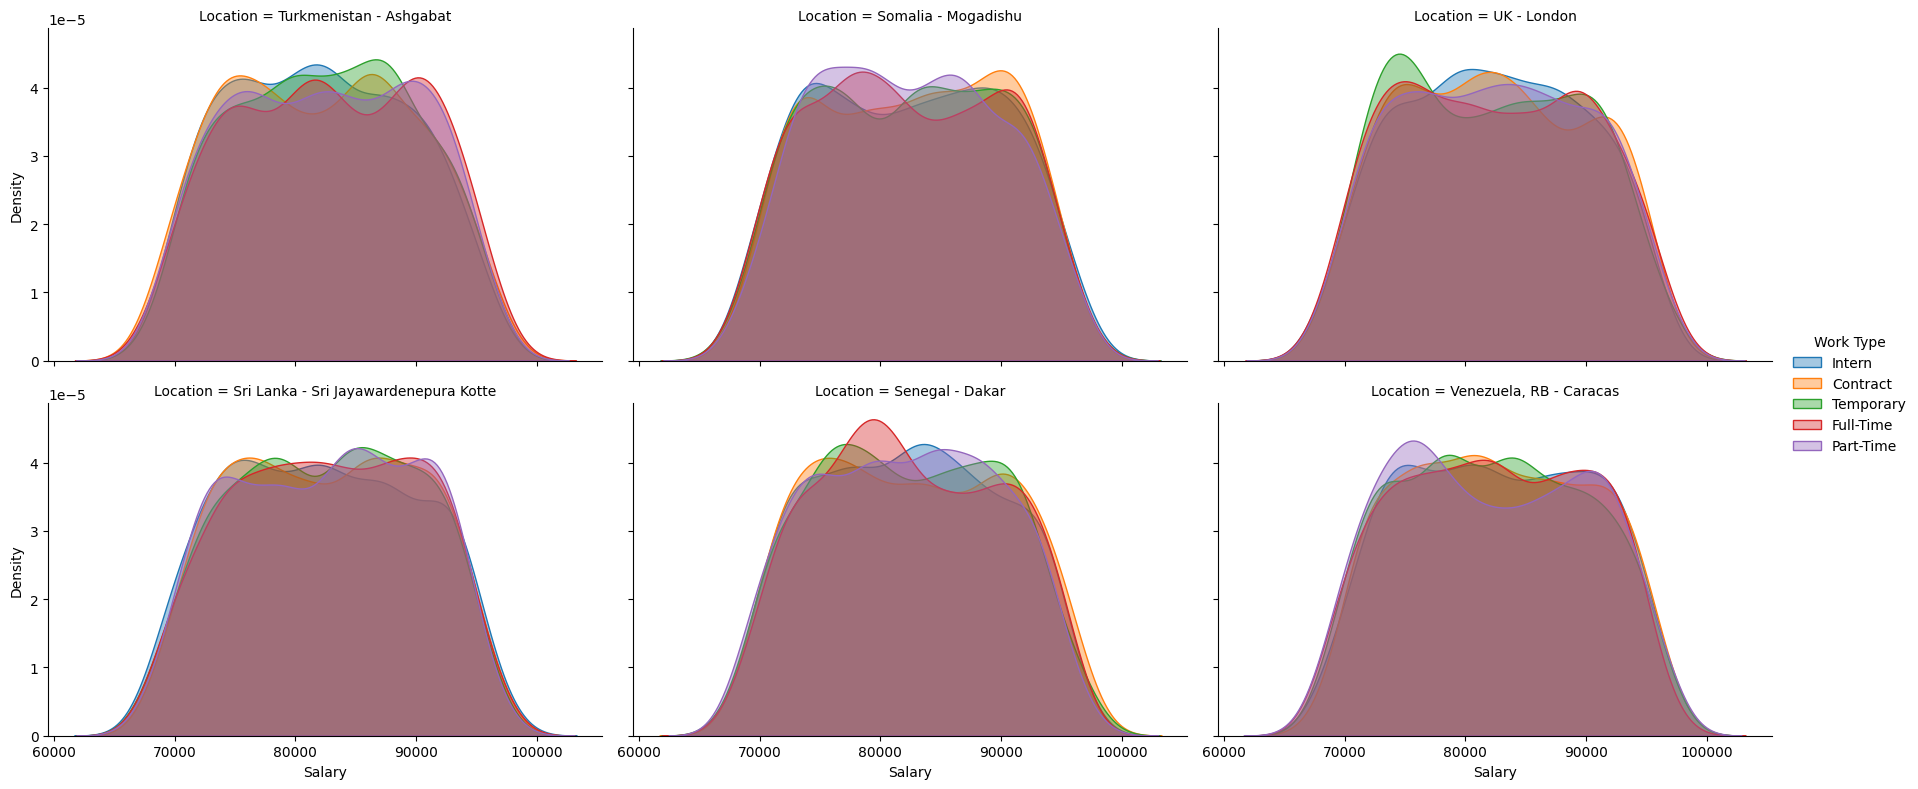

In [86]:
# Select top 6 locations based on job count
top_locations = job_salary_df_visualization["Location"].value_counts().index[:6]
filtered_df = job_salary_df_visualization[job_salary_df_visualization["Location"].isin(top_locations)]

# Create FacetGrid
g = sns.FacetGrid(filtered_df, col="Location", hue="Work Type", height=4, aspect=1.5, col_wrap=3)
g.map(sns.kdeplot, "Salary", fill=True, alpha=0.4)

# Add legend and show plot
g.add_legend()
plt.show()

## Feature Analysis

In [87]:
job_salary_df_visualization.head()

Qualifications  Work Type  Company Size Preference  \
0         M.Tech     Intern         26801     Female   
1            BCA     Intern        100340     Female   
2            PhD  Temporary         84525       Male   
3            PhD  Full-Time        129896     Female   
4            MBA     Intern         53944     Female   

                                            Benefits  \
0  {'Flexible Spending Accounts (FSAs), Relocatio...   
1  {'Health Insurance, Retirement Plans, Paid Tim...   
2  {'Legal Assistance, Bonuses and Incentive Prog...   
3  {'Transportation Benefits, Professional Develo...   
4  {'Flexible Spending Accounts (FSAs), Relocatio...   

                            Company  Min Experience  Max Experience   Salary  \
0                 Icahn Enterprises               5              15  79000.0   
1      PNC Financial Services Group               2              12  86000.0   
2  United Services Automobile Assn.               0              12  82500.0   
3                              Hess               4              11  78000.0   
4                      Cairn Energy               1              12  75500.0   

   Job Post Age (Days)  Job Posting Year                  Location  \
0                 1095              2022     Isle of Man - Douglas   
1                  856              2022   Turkmenistan - Ashgabat   
2                  952              2022  Macao SAR, China - Macao   
3                  788              2023        Benin - Porto-Novo   
4                  925              2022          Chile - Santiago   

                                         Job Profile Company Size Binned  
0  Digital Marketing Specialist - Social Media Ma...               Small  
1             Web Developer - Frontend Web Developer               Large  
2       Operations Manager - Quality Control Manager               Large  
3       Network Engineer - Wireless Network Engineer          Very Large  
4                 Event Manager - Conference Manager              Medium

## Feature Importance Analysis
  
- Train a simple Random Forest Regressor or Decision Tree.

- Extract feature importance scores to rank predictors.

- Visualize results using a bar chart.

In [88]:
job_salary_df_visualization.head()

Qualifications  Work Type  Company Size Preference  \
0         M.Tech     Intern         26801     Female   
1            BCA     Intern        100340     Female   
2            PhD  Temporary         84525       Male   
3            PhD  Full-Time        129896     Female   
4            MBA     Intern         53944     Female   

                                            Benefits  \
0  {'Flexible Spending Accounts (FSAs), Relocatio...   
1  {'Health Insurance, Retirement Plans, Paid Tim...   
2  {'Legal Assistance, Bonuses and Incentive Prog...   
3  {'Transportation Benefits, Professional Develo...   
4  {'Flexible Spending Accounts (FSAs), Relocatio...   

                            Company  Min Experience  Max Experience   Salary  \
0                 Icahn Enterprises               5              15  79000.0   
1      PNC Financial Services Group               2              12  86000.0   
2  United Services Automobile Assn.               0              12  82500.0   
3                              Hess               4              11  78000.0   
4                      Cairn Energy               1              12  75500.0   

   Job Post Age (Days)  Job Posting Year                  Location  \
0                 1095              2022     Isle of Man - Douglas   
1                  856              2022   Turkmenistan - Ashgabat   
2                  952              2022  Macao SAR, China - Macao   
3                  788              2023        Benin - Porto-Novo   
4                  925              2022          Chile - Santiago   

                                         Job Profile Company Size Binned  
0  Digital Marketing Specialist - Social Media Ma...               Small  
1             Web Developer - Frontend Web Developer               Large  
2       Operations Manager - Quality Control Manager               Large  
3       Network Engineer - Wireless Network Engineer          Very Large  
4                 Event Manager - Conference Manager              Medium

In [89]:
job_salary_df_visualization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   Qualifications       1048575 non-null  object  
 1   Work Type            1048575 non-null  object  
 2   Company Size         1048575 non-null  int64   
 3   Preference           1048575 non-null  object  
 4   Benefits             1048575 non-null  object  
 5   Company              1048575 non-null  object  
 6   Min Experience       1048575 non-null  int64   
 7   Max Experience       1048575 non-null  int64   
 8   Salary               1048575 non-null  float64 
 9   Job Post Age (Days)  1048575 non-null  int64   
 10  Job Posting Year     1048575 non-null  int32   
 11  Location             1048575 non-null  object  
 12  Job Profile          1048575 non-null  object  
 13  Company Size Binned  1048575 non-null  category
dtypes: category(1), float64(1), int32(

In [90]:
# Sample 20% of data to speed up training
df_sample = job_salary_df_visualization.sample(frac=0.2, random_state=42)

# Define features and target
features = ['Min Experience', 'Max Experience', 'Company Size', 'Work Type', 'Job Profile', 'Location']
df_encoded = df_sample.copy()

# Encode only categorical columns
label_encoders = {}
for col in ['Work Type', 'Job Profile', 'Location']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoders for later use (optional)

# Define X (features) and y (target)
X = df_encoded[features]
y = df_encoded['Salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the optimized model
rf = RandomForestRegressor(n_estimators=25, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Show dataset shape
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (167772, 6), Testing set: (41943, 6)


In [91]:

importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


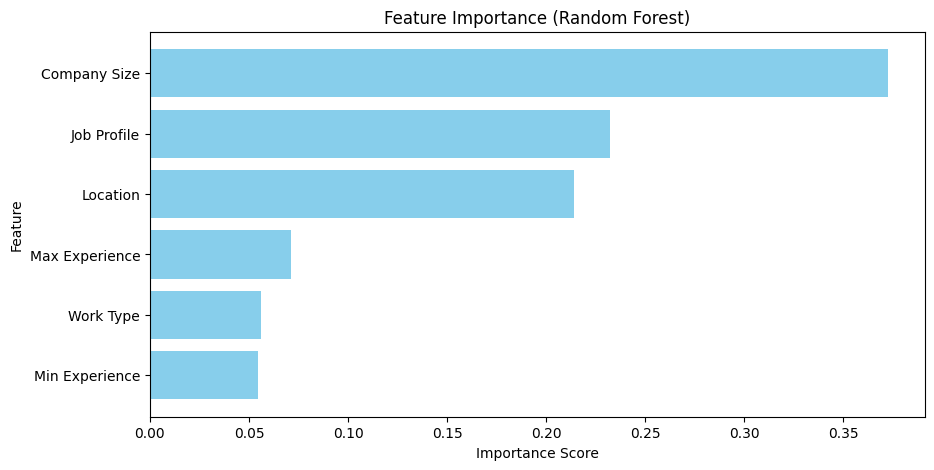

In [92]:

plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


## Continuous Features Correlation Analysis

#### Reason  
- Identifies relationships between numerical features and Salary Range.  
- Helps in selecting strong predictors.  

#### Method:  
- Compute correlation matrix.  
- Use a heatmap for visualization.  


In [93]:
# Exclude non-numeric columns
df_numeric = job_salary_df_visualization.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Display correlation matrix
print(corr_matrix)

                     Company Size  Min Experience  Max Experience    Salary  \
Company Size             1.000000       -0.000583       -0.001433  0.000469   
Min Experience          -0.000583        1.000000       -0.000467  0.002010   
Max Experience          -0.001433       -0.000467        1.000000 -0.000366   
Salary                   0.000469        0.002010       -0.000366  1.000000   
Job Post Age (Days)     -0.002082       -0.001178        0.000082 -0.000325   
Job Posting Year         0.001335        0.001806        0.000498 -0.000043   

                     Job Post Age (Days)  Job Posting Year  
Company Size                   -0.002082          0.001335  
Min Experience                 -0.001178          0.001806  
Max Experience                  0.000082          0.000498  
Salary                         -0.000325         -0.000043  
Job Post Age (Days)             1.000000         -0.906306  
Job Posting Year               -0.906306          1.000000  


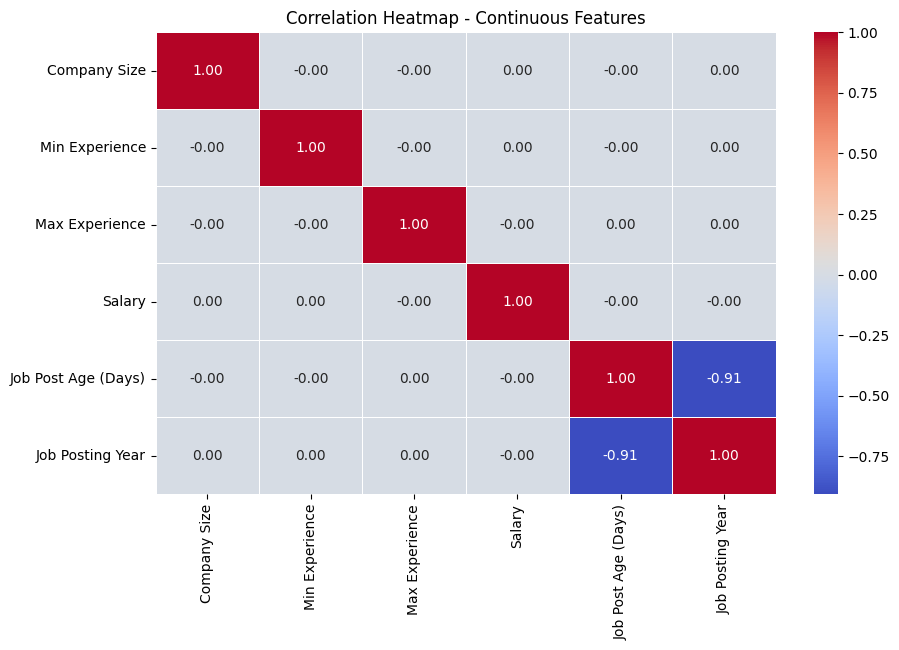

In [94]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Continuous Features")
plt.show()


In [95]:
salary_corr = corr_matrix['Salary'].drop('Salary').sort_values(ascending=False)
salary_corr


Min Experience         0.002010
Company Size           0.000469
Job Posting Year      -0.000043
Job Post Age (Days)   -0.000325
Max Experience        -0.000366
Name: Salary, dtype: float64

In [96]:
strong_corr = salary_corr[abs(salary_corr) > 0.3]
strong_corr


Series([], Name: Salary, dtype: float64)

In [97]:
strong_features = strong_corr.index.tolist()

for feature in strong_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=job_salary_df_visualization[feature], y=job_salary_df_visualization['Salary'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Salary")
    plt.title(f"Salary vs {feature}")
    plt.show()

##Categorical Features

- Analyzes how categories affect Salary.  
- Helps identify salary trends across job roles, locations, work types, and qualifications.  


- Use groupby() to compute mean, median, and count for each category.  
- Visualize using box plots, bar charts, and violin plots.  


In [98]:
cat_features = ['Job Profile', 'Work Type', 'Location', 'Min Experience', 'Max Experience']

for feature in cat_features:
    grouped_data = job_salary_df_visualization.groupby(feature)['Salary'].agg(['mean', 'median', 'count'])
    print(f"\nSalary Summary for {feature}:\n")
    display(grouped_data.sort_values(by='mean', ascending=False))


Salary Summary for Job Profile:



mean   median  \
Job Profile                                                                 
Physical Therapist - Geriatric Physical Therapist   82865.859130  83000.0   
Art Director - Visual Designer                      82851.513802  83000.0   
Finance Manager - Treasury Manager                  82842.177493  83000.0   
Network Engineer - Wireless Network Engineer        82830.108011  83000.0   
QA Analyst - Software QA Tester                     82826.367274  83000.0   
...                                                          ...      ...   
Java Developer - Java Backend Developer             82156.042497  82000.0   
Pediatrician - Pediatric Specialist                 82144.142168  82000.0   
Front-End Engineer - JavaScript Developer           82136.114623  82000.0   
Sales Manager - Key Account Manager                 82132.530120  82000.0   
Customer Service Representative - Call Center A...  82016.122098  81500.0   

                                                    count  
Job Profile                                                
Physical Therapist - Geriatric Physical Therapist    2229  
Art Director - Visual Designer                       2246  
Finance Manager - Treasury Manager                   2186  
Network Engineer - Wireless Network Engineer         2222  
QA Analyst - Software QA Tester                      2249  
...                                                   ...  
Java Developer - Java Backend Developer              2259  
Pediatrician - Pediatric Specialist                  2279  
Front-End Engineer - JavaScript Developer            2373  
Sales Manager - Key Account Manager                  2241  
Customer Service Representative - Call Center A...   2326  

[376 rows x 3 columns]


Salary Summary for Work Type:



mean   median   count
Work Type                               
Full-Time  82497.752164  82500.0  209090
Intern     82494.558781  82500.0  209420
Part-Time  82493.009106  82500.0  210202
Temporary  82489.536223  82500.0  210058
Contract   82484.809704  82500.0  209805


Salary Summary for Location:



mean   median  count
Location                                                       
American Samoa - Apia              82737.040816  83000.0   4900
Italy - Rome                       82731.471977  83000.0   4871
Timor-Leste - Dili                 82729.441306  83000.0   4779
Bosnia and Herzegovina - Sarajevo  82726.531875  82500.0   4847
Honduras - Tegucigalpa             82724.819773  83000.0   4855
...                                         ...      ...    ...
Mozambique - Maputo                82292.049249  82000.0   4792
Israel - Jerusalem                 82289.943313  82000.0   4763
Sweden - Stockholm                 82286.745273  82000.0   4919
Guyana - Georgetown                82271.672772  82000.0   4914
Turkey - Ankara                    82256.506350  82000.0   4803

[216 rows x 3 columns]


Salary Summary for Min Experience:



mean   median   count
Min Experience                               
5               82513.936637  82500.0  175401
2               82513.615174  82500.0  174401
4               82503.289983  82500.0  174469
3               82486.691972  82500.0  174669
0               82470.302565  82500.0  174409
1               82463.743965  82500.0  175226


Salary Summary for Max Experience:



mean   median   count
Max Experience                               
15              82527.683922  82500.0  130816
11              82522.370361  82500.0  131558
8               82495.846961  82500.0  131470
10              82494.135077  82500.0  130607
12              82493.642195  82500.0  131256
9               82491.402877  82500.0  131323
14              82457.020451  82500.0  130946
13              82453.100713  82500.0  130599

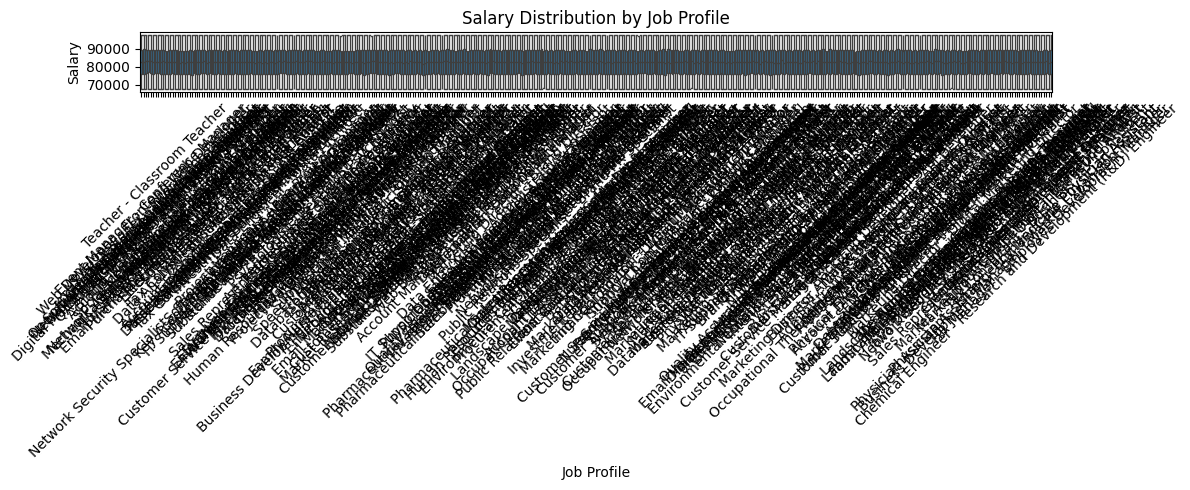

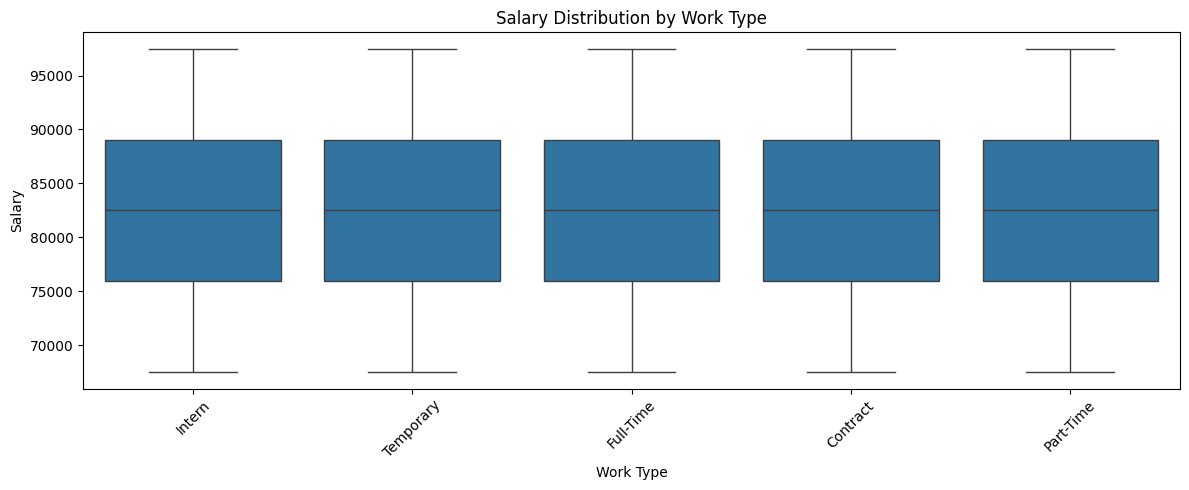

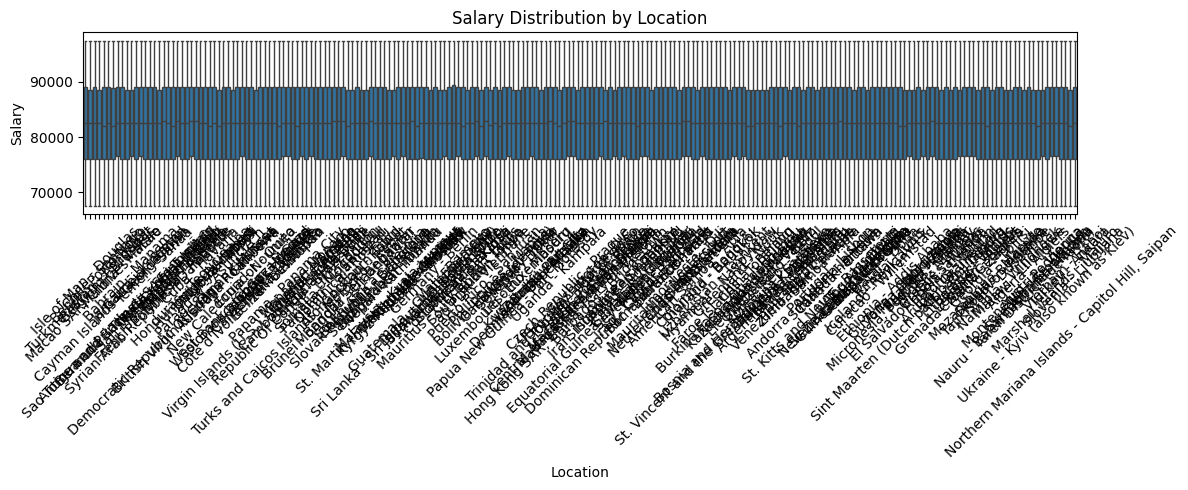

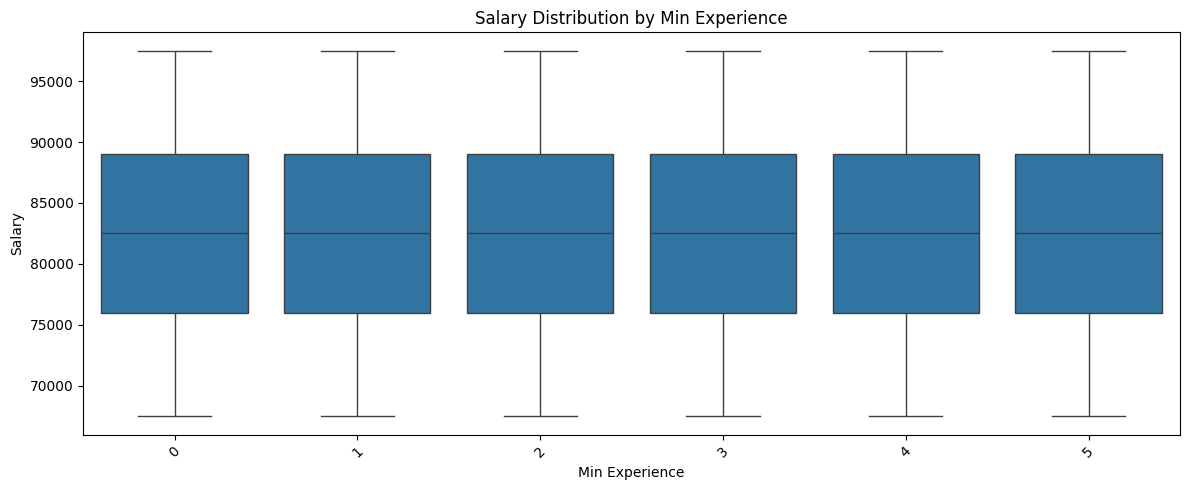

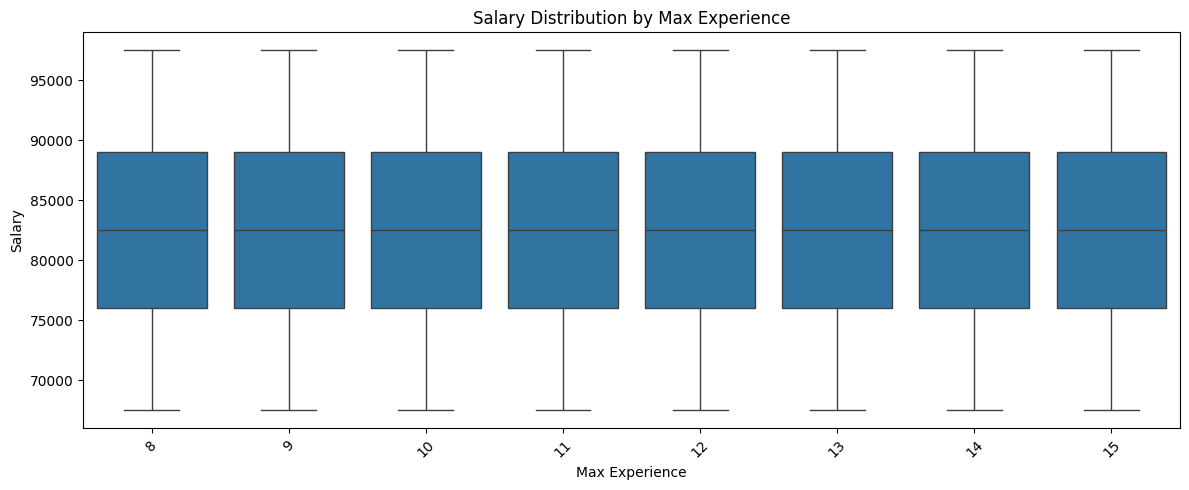

In [99]:
for feature in cat_features:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=job_salary_df_visualization[feature], y=job_salary_df_visualization['Salary'])
    plt.xlabel(feature)
    plt.ylabel("Salary")
    plt.xticks(rotation=45)
    plt.title(f"Salary Distribution by {feature}")
    plt.tight_layout()
    plt.show()

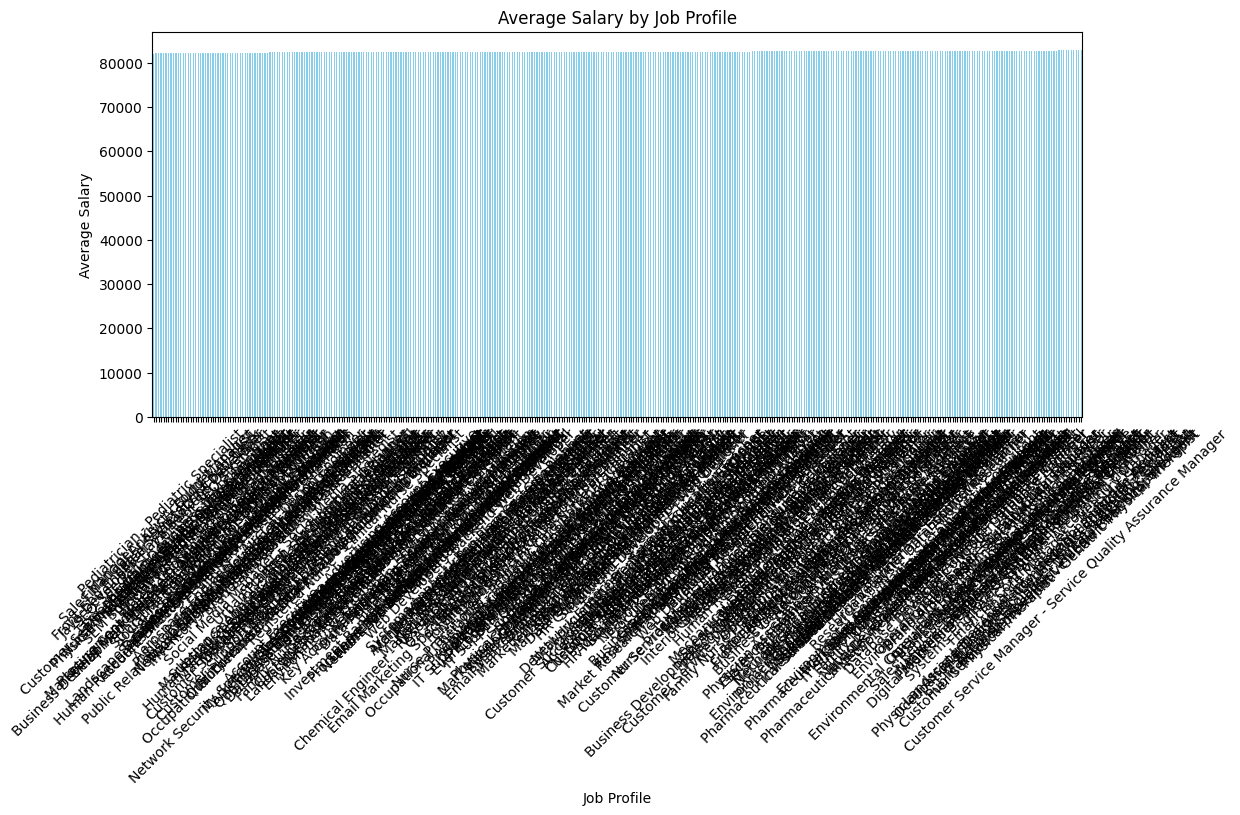

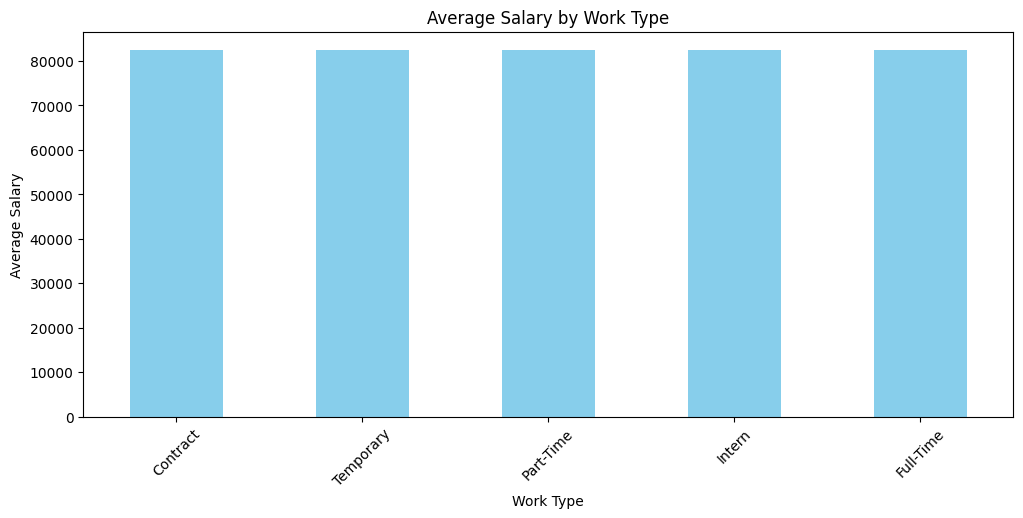

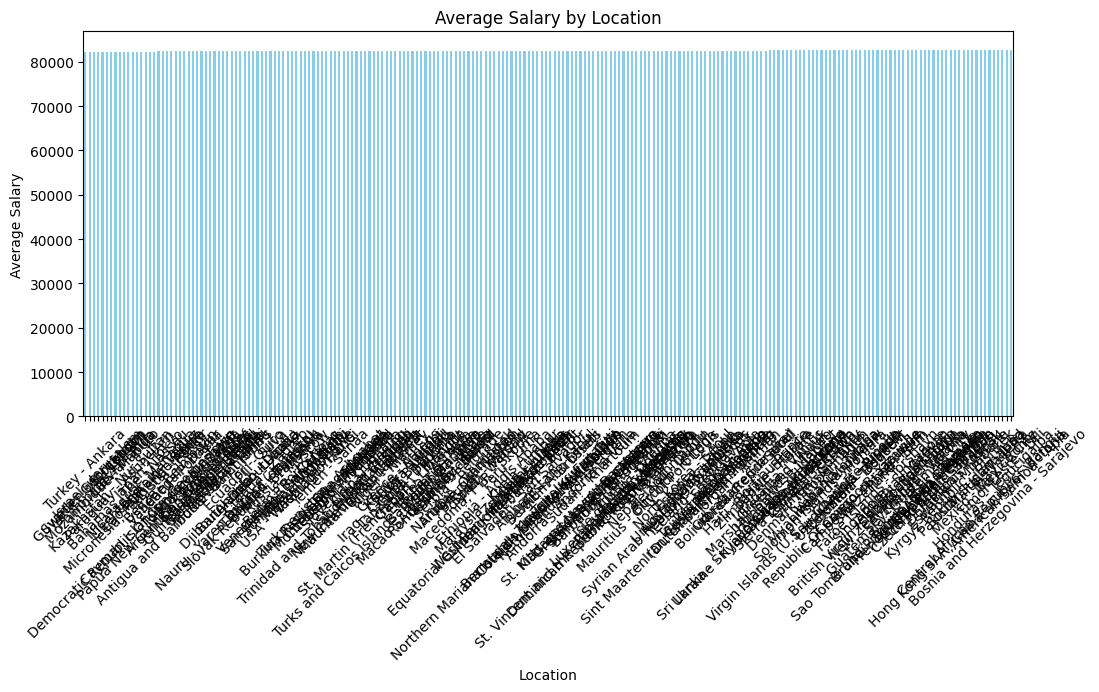

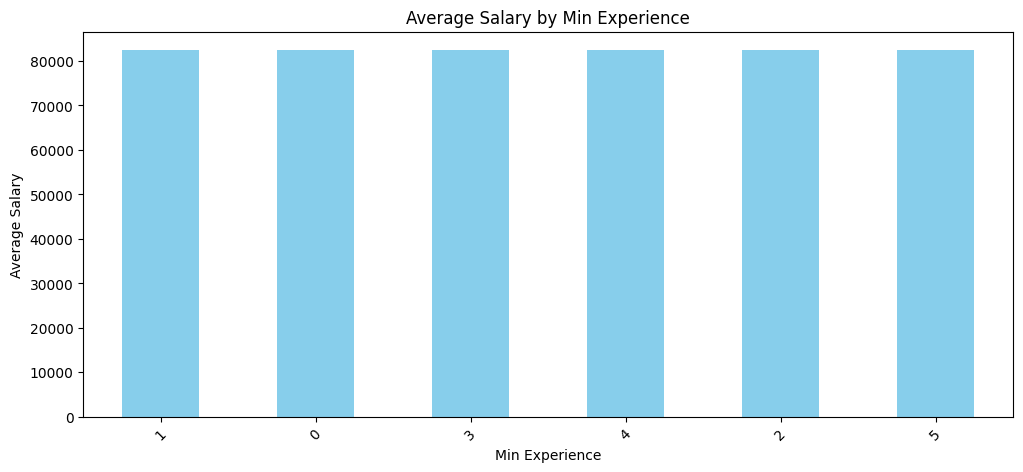

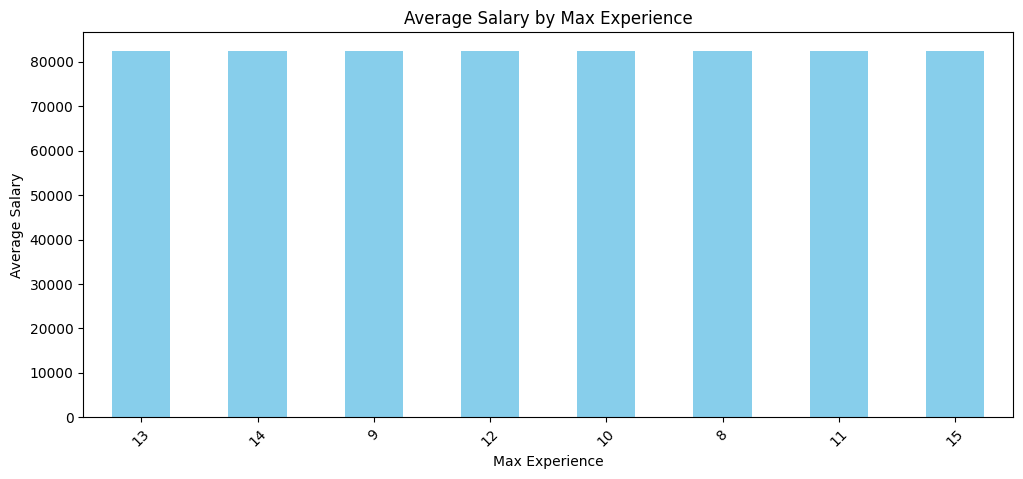

In [100]:
for feature in cat_features:
    plt.figure(figsize=(12, 5))
    job_salary_df_visualization.groupby(feature)['Salary'].mean().sort_values().plot(kind='bar', color='skyblue')
    plt.title(f"Average Salary by {feature}")
    plt.ylabel("Average Salary")
    plt.xticks(rotation=45)
    plt.show()


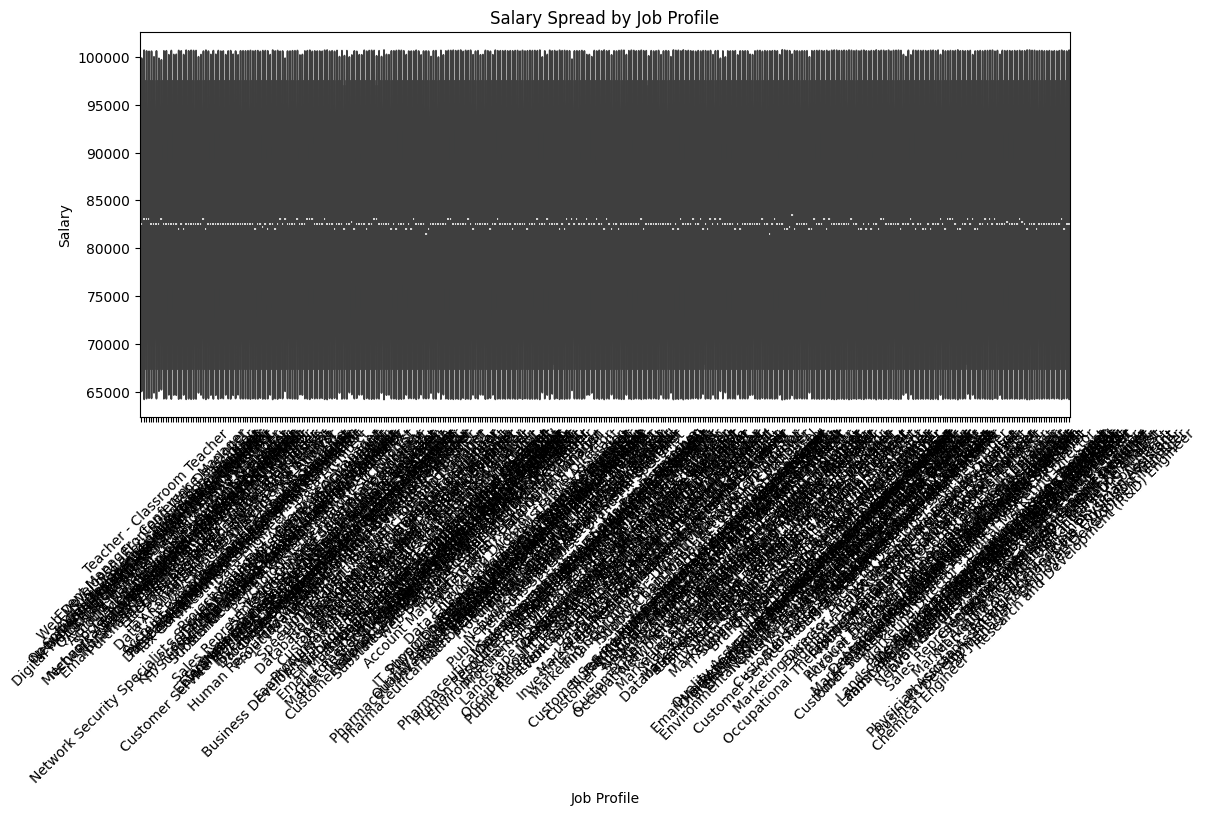

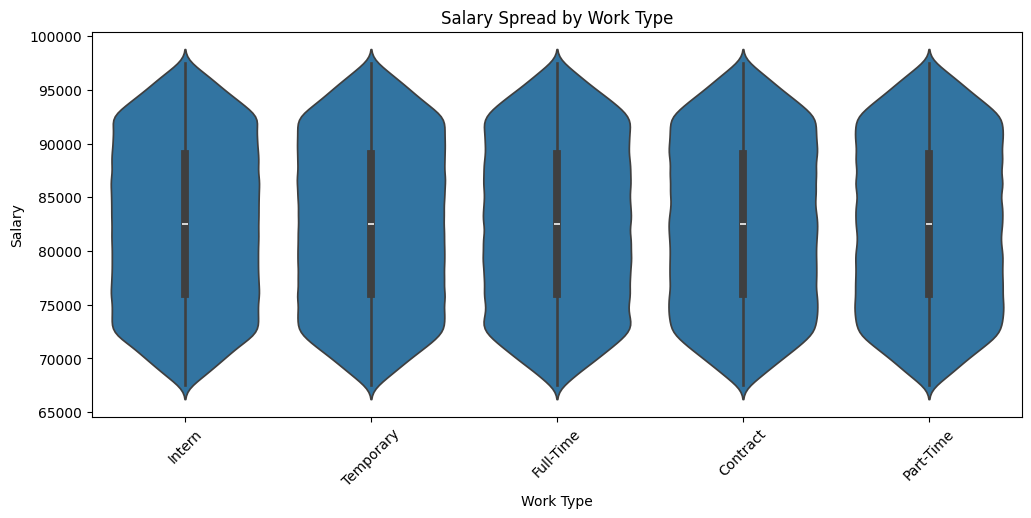

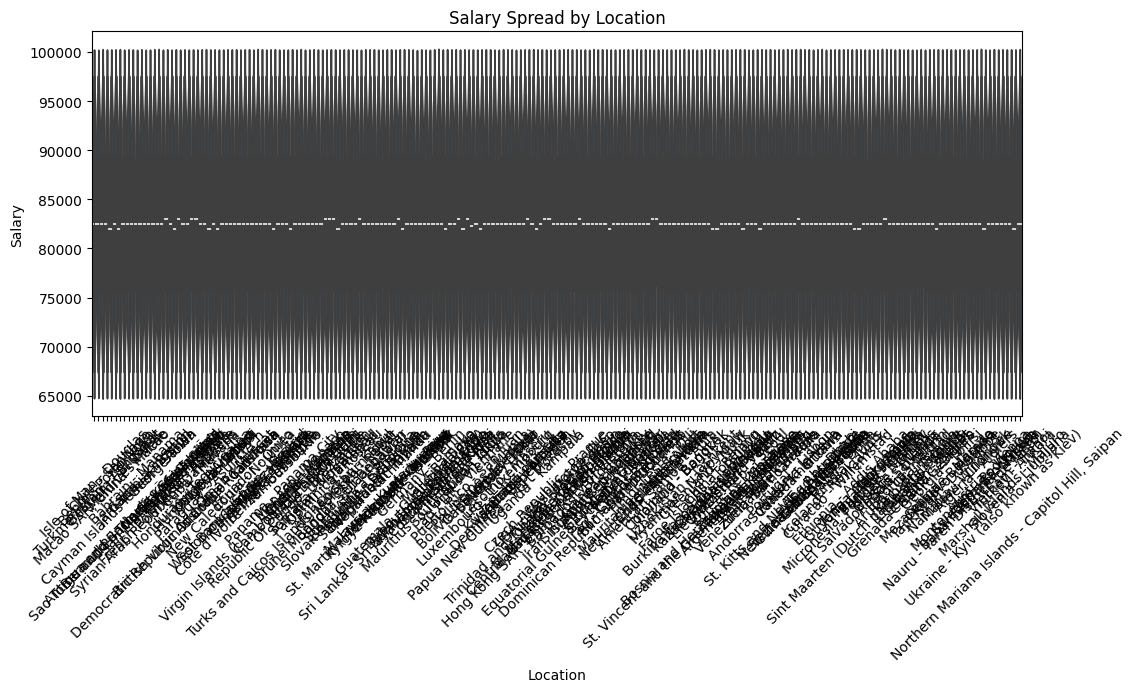

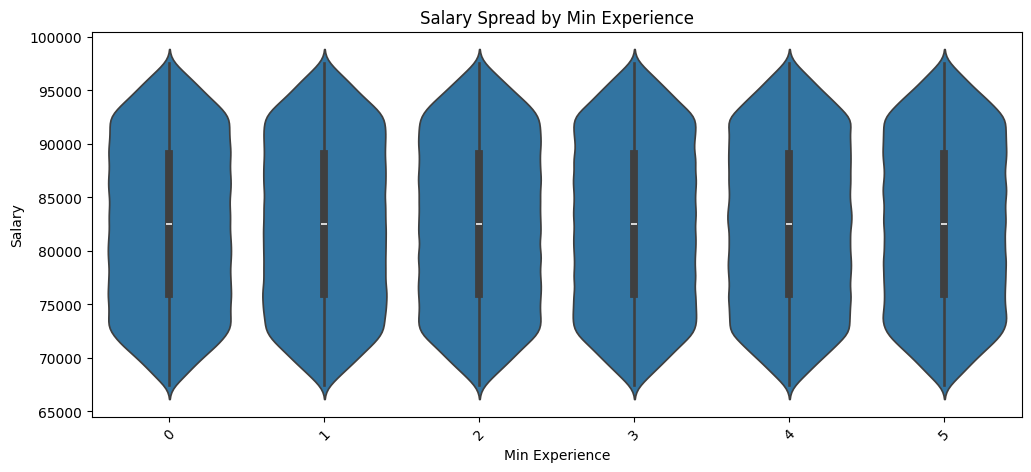

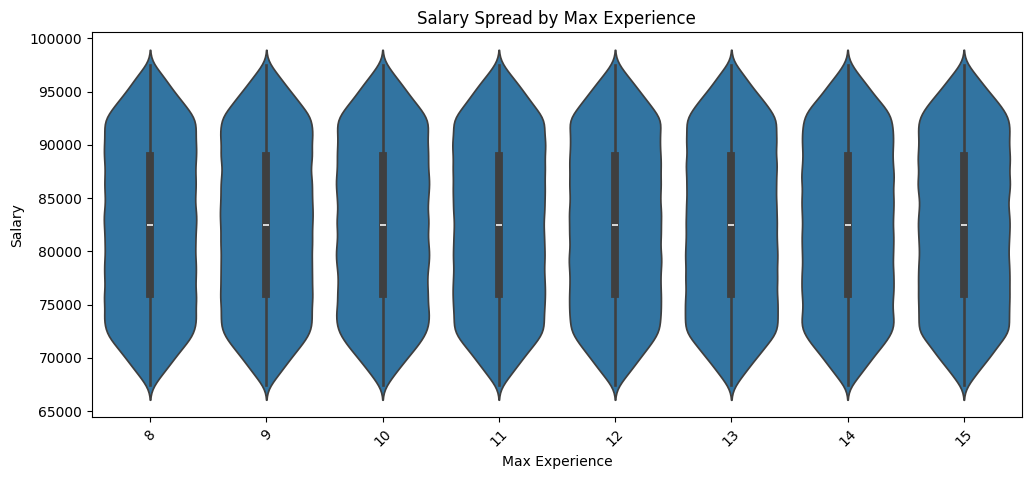

In [101]:
for feature in cat_features:
    plt.figure(figsize=(12, 5))
    sns.violinplot(x=job_salary_df_visualization[feature], y=job_salary_df_visualization['Salary'])
    plt.xticks(rotation=45)
    plt.title(f"Salary Spread by {feature}")
    plt.show()

# **5. Model Training**



In [102]:
job_salary_model_training_df = pd.read_csv('job_salary_df_model.csv')

In [103]:
job_salary_model_training_df.head()

Work Type  Company Size  Preference  Min Experience  Max Experience  \
0          0     -1.328587           1               5              15   
1          0      0.754414           1               2              12   
2          2      0.306452           2               0              12   
3          4      1.591591           1               4              11   
4          0     -0.559758           1               1              12   

    Salary  Job Post Age (Days)  Job Posting Year  Qual_B.Com  Qual_B.Tech  \
0  79000.0             0.697260               0.5       False        False   
1  86000.0             0.369863               0.5       False        False   
2  82500.0             0.501370               0.5       False        False   
3  78000.0             0.276712               1.0       False        False   
4  75500.0             0.464384               0.5       False        False   

   ...  Benefit_Relocation Assistance  Benefit_Retirement Plans  \
0  ...                              1                         0   
1  ...                              0                         1   
2  ...                              0                         0   
3  ...                              0                         0   
4  ...                              1                         0   

   Benefit_Retirement Plans'  Benefit_Social and Recreational Activities  \
0                          0                                           0   
1                          0                                           0   
2                          1                                           0   
3                          0                                           0   
4                          0                                           0   

   Benefit_Social and Recreational Activities'  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Benefit_Stock Options or Equity Grants  Benefit_Transportation Benefits  \
0                                       0                                0   
1                                       0                                0   
2                                       0                                0   
3                                       0                                0   
4                                       0                                0   

   Benefit_Tuition Reimbursement  Benefit_Wellness Programs  Company Encoded  
0                              0                          0     82513.178914  
1                              0                          0     82470.489039  
2                              0                          1     82556.078767  
3                              0                          0     82318.065068  
4                              0                          0     82476.562500  

[5 rows x 64 columns]

# **6. Loading Data for Power BI**



In [104]:
job_salary_power_bi_df = pd.read_csv('job_salary_df_visualization.csv')

In [105]:
job_salary_power_bi_df.head()

Qualifications  Work Type  Company Size Preference  \
0         M.Tech     Intern         26801     Female   
1            BCA     Intern        100340     Female   
2            PhD  Temporary         84525       Male   
3            PhD  Full-Time        129896     Female   
4            MBA     Intern         53944     Female   

                                            Benefits  \
0  {'Flexible Spending Accounts (FSAs), Relocatio...   
1  {'Health Insurance, Retirement Plans, Paid Tim...   
2  {'Legal Assistance, Bonuses and Incentive Prog...   
3  {'Transportation Benefits, Professional Develo...   
4  {'Flexible Spending Accounts (FSAs), Relocatio...   

                            Company  Min Experience  Max Experience   Salary  \
0                 Icahn Enterprises               5              15  79000.0   
1      PNC Financial Services Group               2              12  86000.0   
2  United Services Automobile Assn.               0              12  82500.0   
3                              Hess               4              11  78000.0   
4                      Cairn Energy               1              12  75500.0   

   Job Post Age (Days)  Job Posting Year                  Location  \
0                 1095              2022     Isle of Man - Douglas   
1                  856              2022   Turkmenistan - Ashgabat   
2                  952              2022  Macao SAR, China - Macao   
3                  788              2023        Benin - Porto-Novo   
4                  925              2022          Chile - Santiago   

                                         Job Profile  
0  Digital Marketing Specialist - Social Media Ma...  
1             Web Developer - Frontend Web Developer  
2       Operations Manager - Quality Control Manager  
3       Network Engineer - Wireless Network Engineer  
4                 Event Manager - Conference Manager